# **Analysing the MOS data**

In [1]:
from IPython.display import Image

---

## Table of Contents

* [1. Generating the events files](#event_files)
* [2. Creating an Image](#Image)
* [3. Creating a Lightcurve](#lightcurve)
    * [3.1 Standard Filters](#filters)
    * [3.2 Light Curve](#lightcurve)
    * [3.3 Trimming the Data](#trim)
* [ 4. Checking for Pile Up](#pileup)
    * [4.1 MOS1](#mos1)
    * [4.2 MOS2](#mos2)
* [5. Preparing the Spectrum](#spec_prep)
    * [5.1 MOS1](#spec_prep_mos1)
    * [5.2 MOS1](#spec_prep_mos2)
* [6. XSPEC](#xspec)
    * [6.1 MOS1](#xspec_mos1)
        * [6.1.1 Mos1 Unfolded Spectrum](#mos1_unfolded)
    * [6.2 MOS2](#xspec_mos2)
        * [6.2.1 Mos2 Unfolded Spectrum](#mos2_eeufs)

## Generating the Events Files

To analyse the MOS data, the imaging events files first needed to be created. First the ODF location needed to be established

In [ ]:
export SAS_ODF='/data/cluster4/jamie_and_jeton/work_dir/0301_0029740101_data/0301_0029740101_SCX00000SUM.SAS'

In [ ]:
emproc

Got errors as it couldn't find the ccf file. I re-ran `cifbuild` in the working directory and reset where the ccf.cif file was located by running the command:

In [ ]:
export SAS_CCF='/data/cluster4/jamie_and_jeton/work_dir/0301_0029740101_data/ccf.cif'

In [ ]:
emproc 

All the imaging and bad events files were created, there are a lot of bad imaging events files, I am not sure if this is an error or just how the data is. The imaging events files for the two cameras were renamed:

In [ ]:
mv 0301_0029740101_EMOS1_S001_ImagingEvts.ds mos1.fits

In [ ]:
mv 0301_0029740101_EMOS2_S002_ImagingEvts.ds mos2.fits

##  Creating an Image

In [ ]:
 evselect table=mos1.fits withimageset=yes imageset=mos1_image.fits xcolumn=X ycolumn=Y imagebinning=imageSize ximagesize=600 yimagesize=600

In [ ]:
ds9 mos1_image.fits &

<img src=Figures/MOS1%20Image.png width="800" />
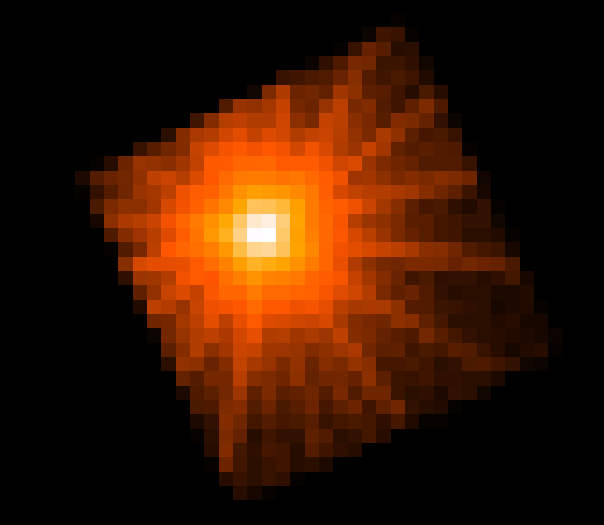

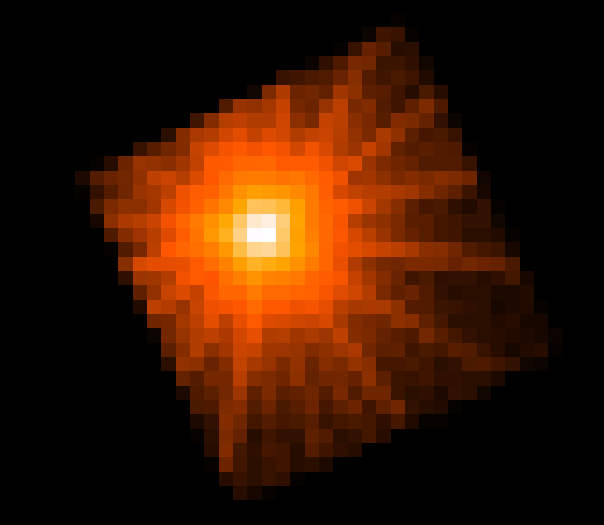

In [6]:
Image(filename="Figures/MOS1 Image.png")

In [ ]:
evselect table=mos2.fits withimageset=yes imageset=mos2_image.fits xcolumn=X ycolumn=Y imagebinning=imageSize ximagesize=600 yimagesize=600

In [ ]:
ds9 mos2_image.fits &

<img src="Figures/MOS2_Image.png">
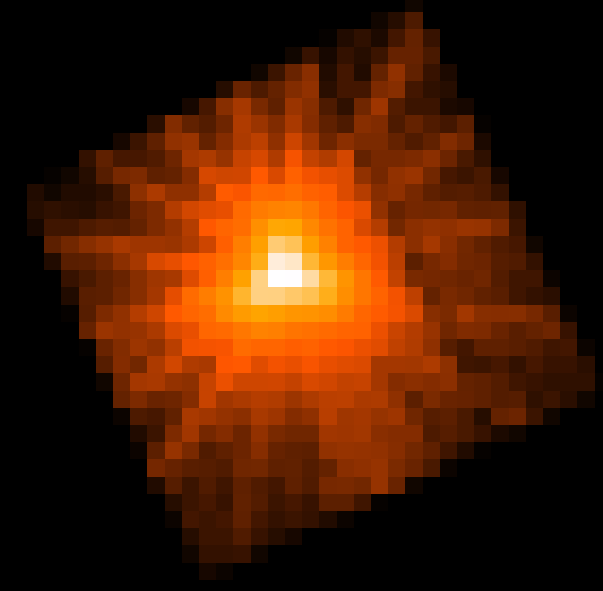

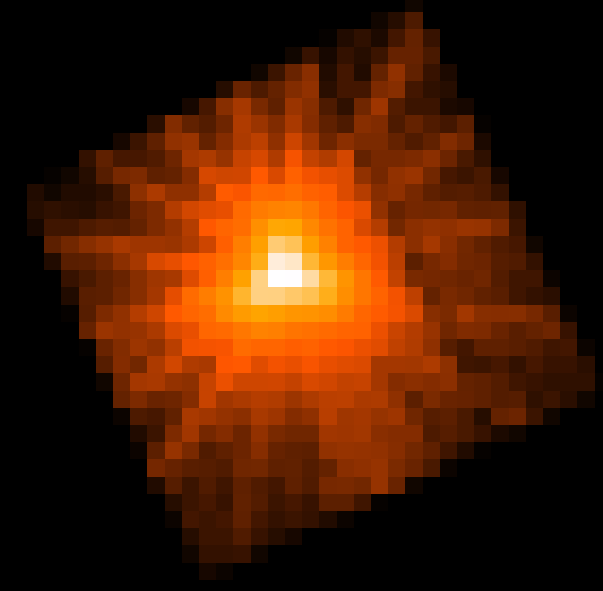

In [7]:
Image(filename="Figures/MOS2_Image.png")

## Creating a Lightcurve

### Standard Filters

In [ ]:
evselect table=mos1.fits withfilteredset=yes expression='(PATTERN <= 12)&&(PI in [200:10000])' filteredset=mos1_filtered.fits filtertype=expression keepfilteroutput=yes updateexposure=yes filterexposure=yes

In [ ]:
evselect table=mos2.fits withfilteredset=yes expression='(PATTERN <= 12)&&(PI in [200:10000])' filteredset=mos2_filtered.fits filtertype=expression keepfilteroutput=yes updateexposure=yes filterexposure=yes

### Light Curve

In [ ]:
evselect table=mos1_filtered.fits withrateset=yes rateset=mos1_lightcurve.fits maketimecolumn=yes timecolumn=TIME timebinsize=100 makeratecolumn=yes

In [ ]:
dsplot table=mos1_lightcurve.fits x=TIME y=RATE

<img src="Figures/MOS1%20lightcurve.png" />
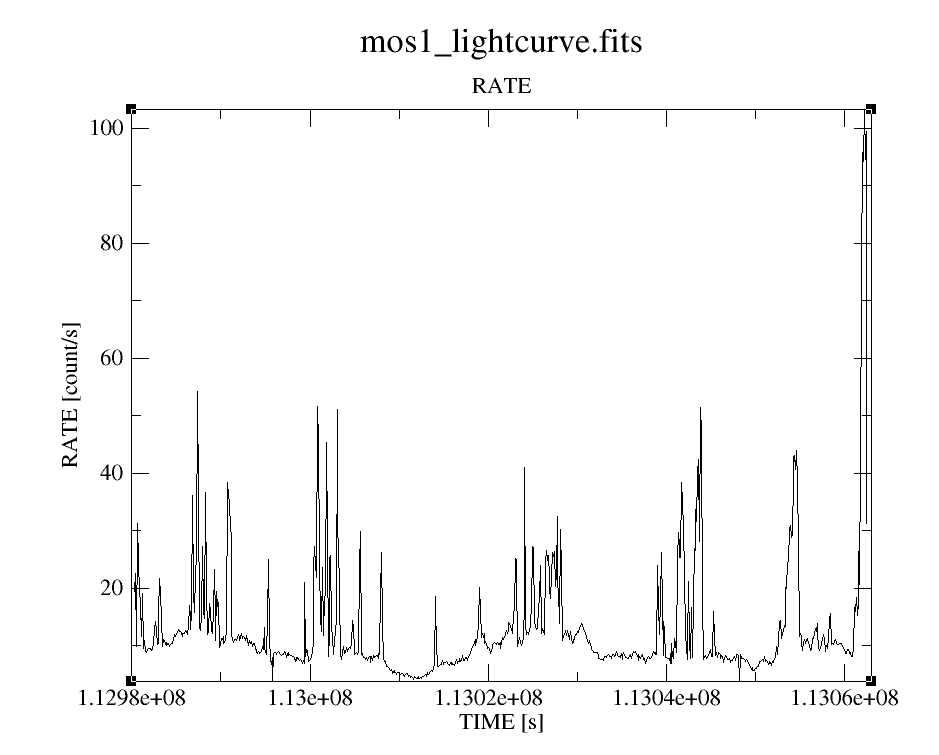

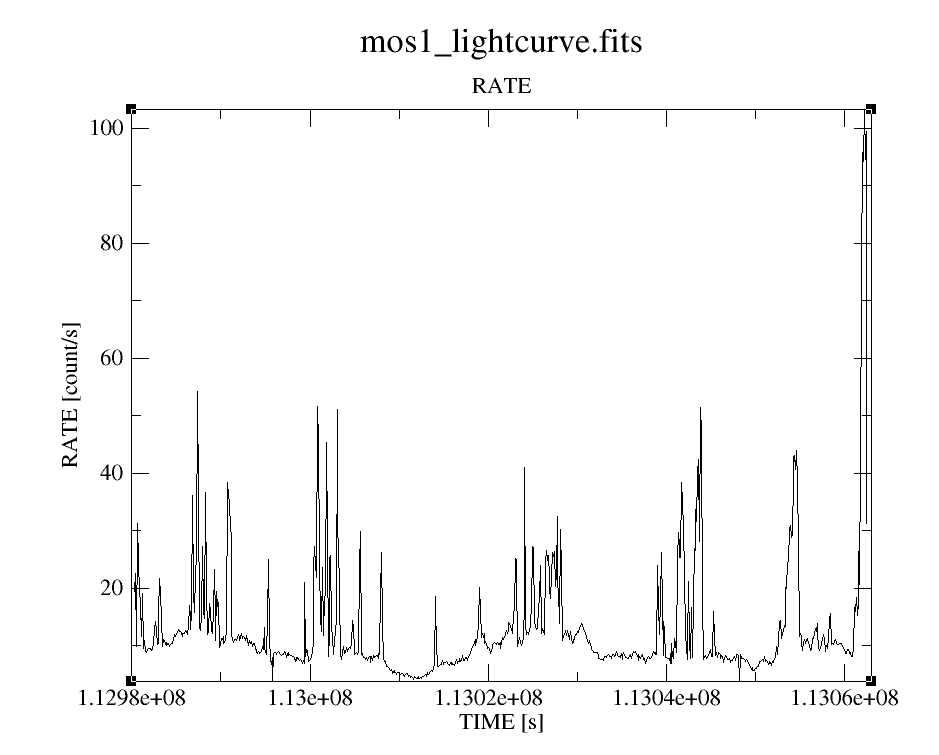

In [9]:
Image(filename="Figures/MOS1 lightcurve.png")

In [ ]:
evselect table=mos2_filtered.fits withrateset=yes rateset=mos2_lightcurve.fits maketimecolumn=yes timecolumn=TIME timebinsize=100 makeratecolumn=yes

In [ ]:
dsplot table=mos2_lightcurve.fits x=TIME y=RATE

<img src="Figures/mos2%20lightcurve.png"/>
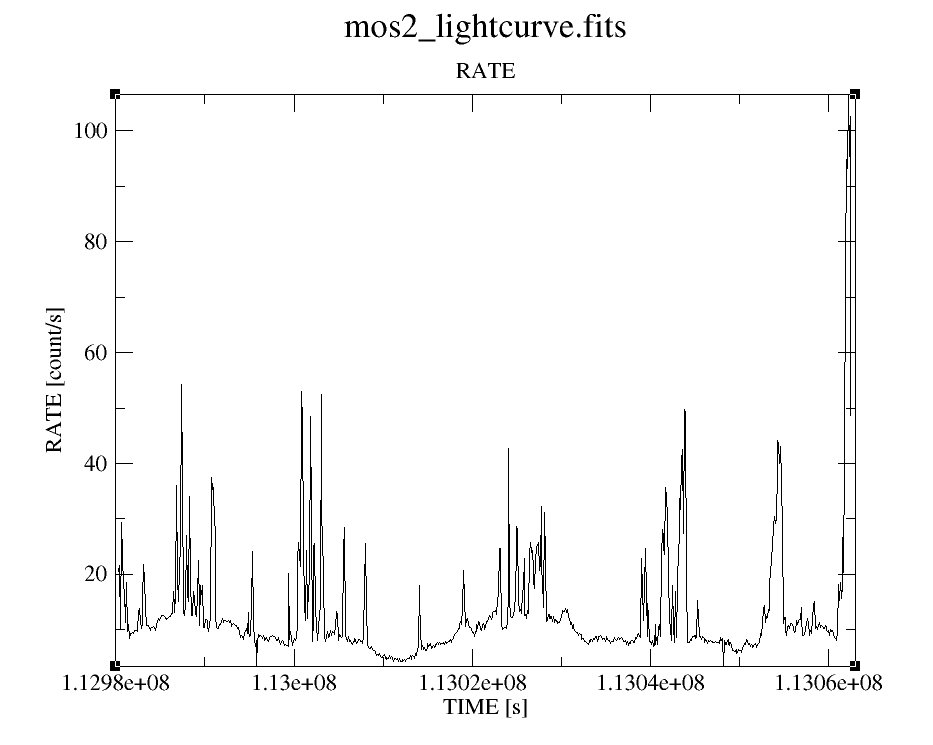

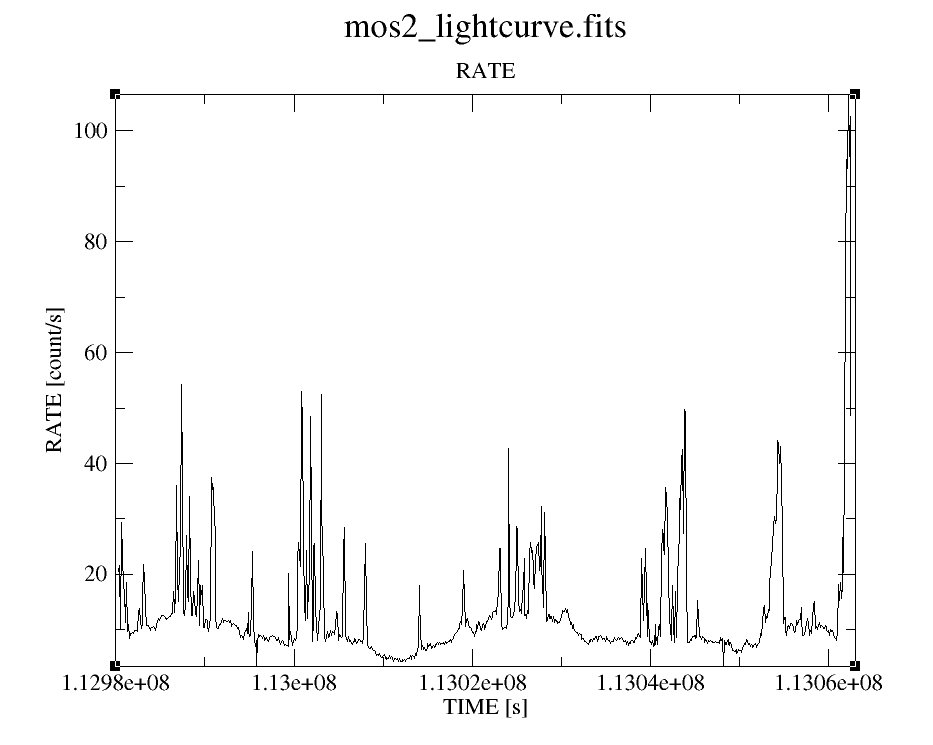

In [11]:
Image(filename="Figures/mos2 lightcurve.png")

### Trimming the Data

There is a flare in both the cameras after 1.1306e8 that will need to be removed

In [ ]:
> mos1_time.txt

In [ ]:
nano mos1_time.txt

In [ ]:
" 0 1.1306e8 +"

In [ ]:
 gtibuild file=mos1_time.txt table=gti.fits

In [ ]:
evselect table=mos1_filtered.fits withfilteredset=yes expression='GTI(gti.fits,TIME)' filteredset=mos1_clean.fits filtertype=expression filterexposure=yes

In [ ]:
evselect table=mos1_clean.fits withrateset=yes rateset=mos1_clean_lightcurve.fits maketimecolumn=yes timecolumn=TIME timebinsize=100 makeratecolumn=yes

In [ ]:
dsplot table=mos1_clean_lightcurve.fits x=TIME y=RATE &

<img src="Figures/mos1%20clean%20lightcurve.png"/>
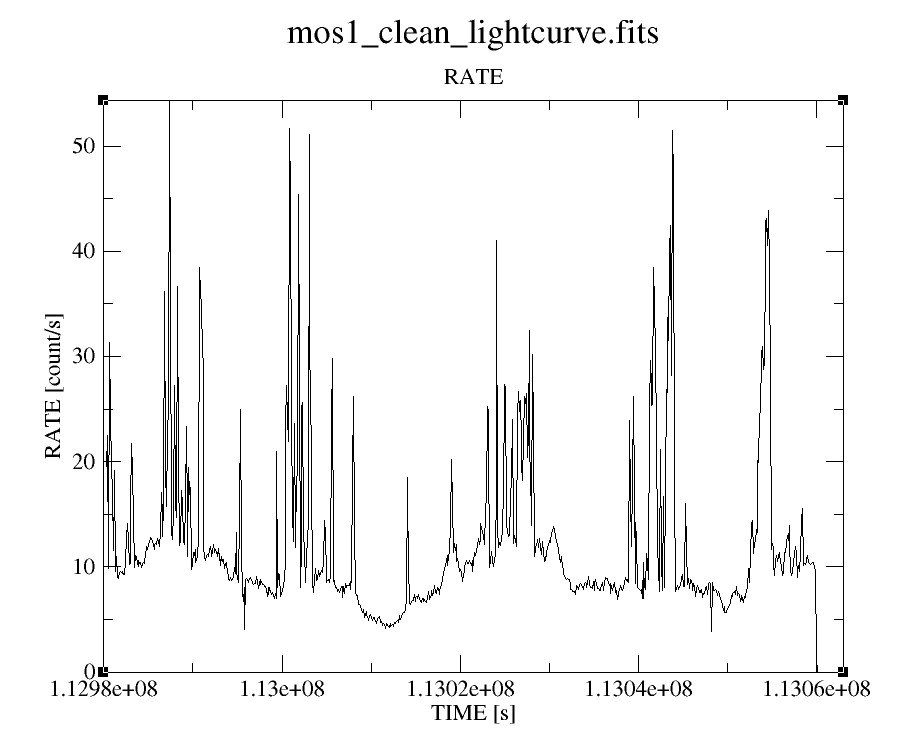

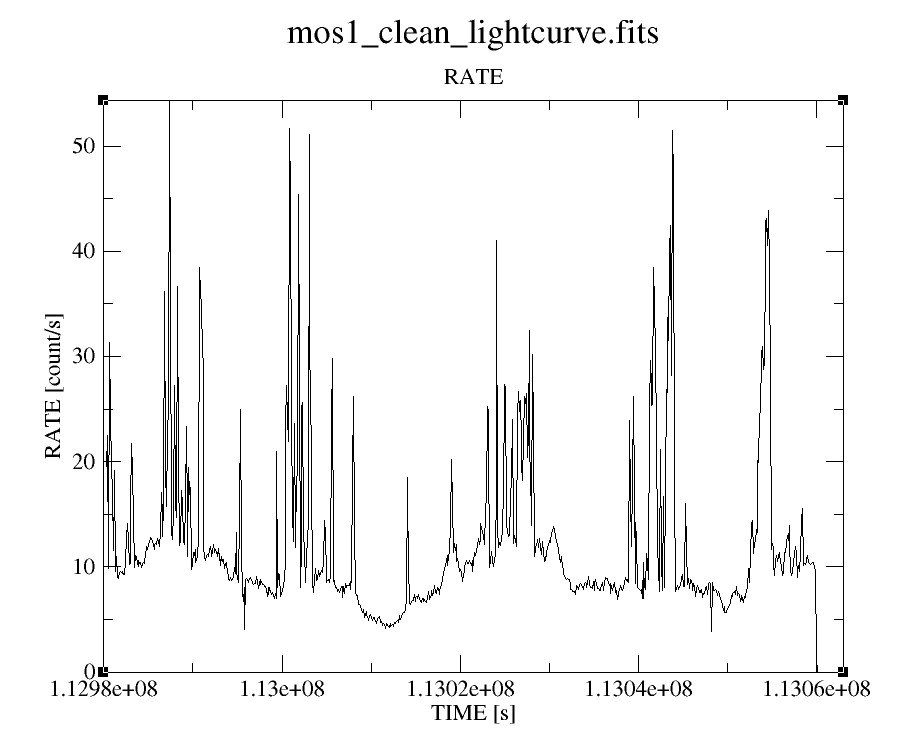

In [42]:
Image(filename="Figures/mos1 clean lightcurve.png")

In [ ]:
evselect table=mos2_filtered.fits withfilteredset=yes expression='GTI(gti.fits,TIME)' filteredset=mos2_clean.fits filtertype=expression filterexposure=yes

In [ ]:
evselect table=mos2_clean.fits withrateset=yes rateset=mos2_clean_lightcurve.fits maketimecolumn=yes timecolumn=TIME timebinsize=100 makeratecolumn=yes

In [ ]:
dsplot table=mos2_clean_lightcurve.fits x=TIME y=RATE &

<img src="Figures/mos2%20clean%20lightcurve.png"/>


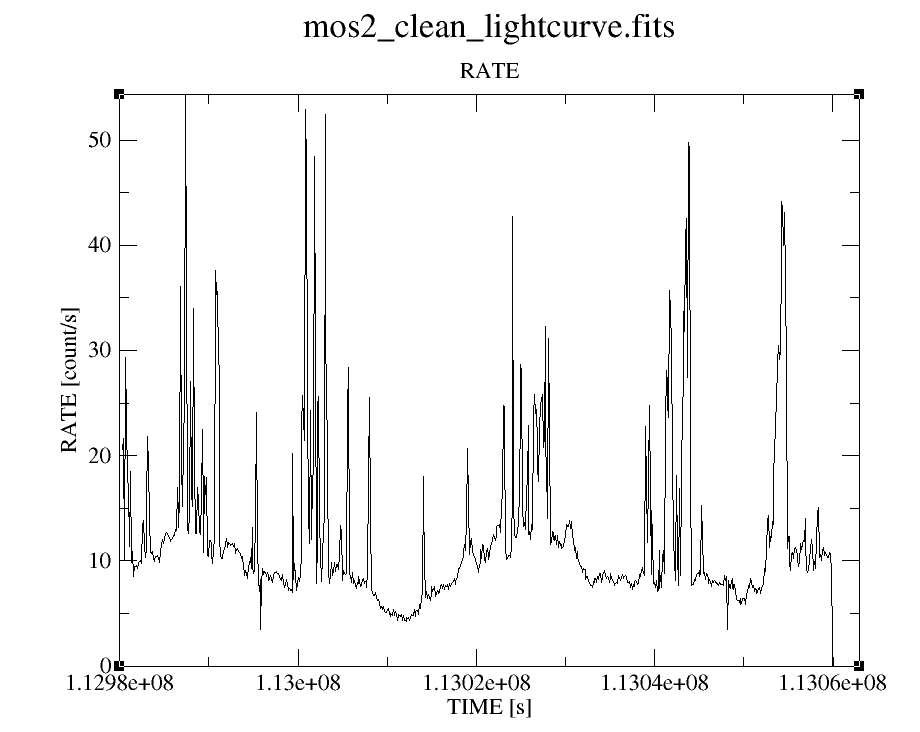

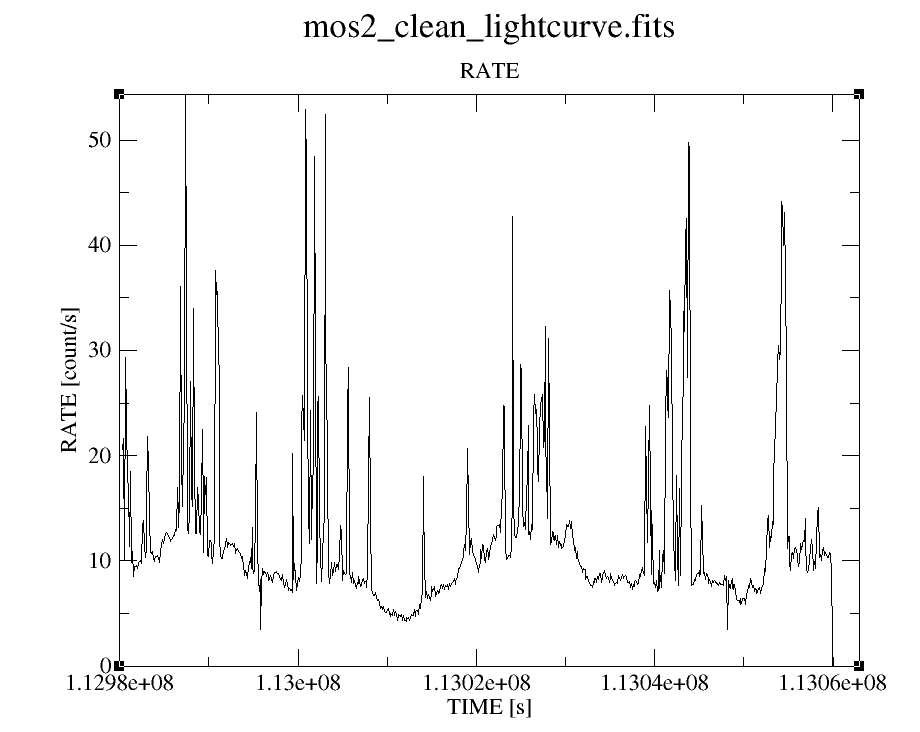

In [44]:
Image(filename="Figures/mos2 clean lightcurve.png")

With the flares at the end of the observations removed, the overall behaviour of the observation can be more clearly seen, although there are still many sharp increases in count rates that may be to do with additional background flares. An analysis of the background lightcurve is needed to detemrine this.

## Checking for Pileup

First the source and background regions need to be determined.
This thread was followed along with the abc guide:
https://www.cosmos.esa.int/web/xmm-newton/sas-thread-mos-spectrum

###  MOS1

In [ ]:
ds9 mos1_filtered.fits &

<img src="Figures/mos1%20regions.png"/>
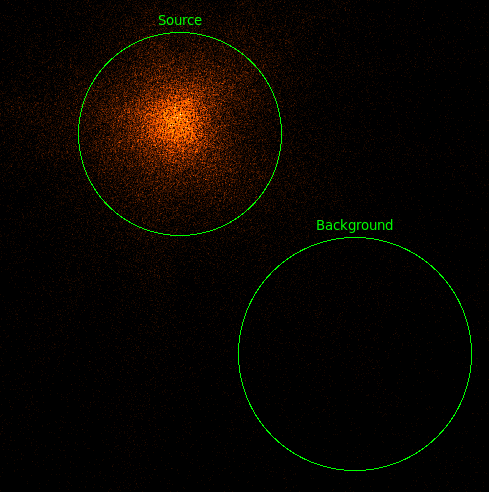

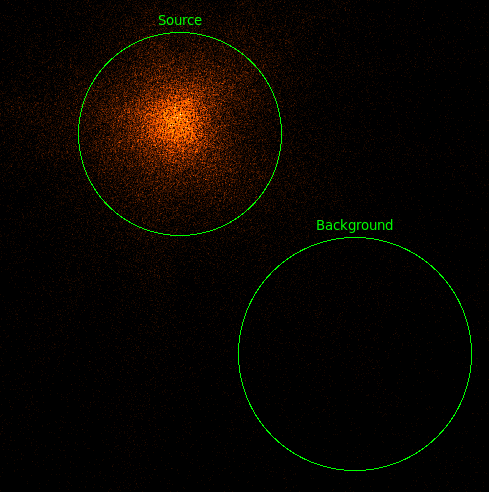

In [13]:
Image(filename="Figures/mos1 regions.png")

<img src="Figures/mos1%20source%20circle.png"/>
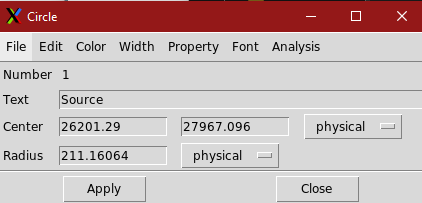

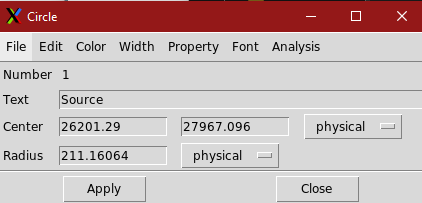

In [14]:
Image(filename="Figures/mos1 source circle.png")

<img src="Figures/mos1%20back%20circle.png"/>
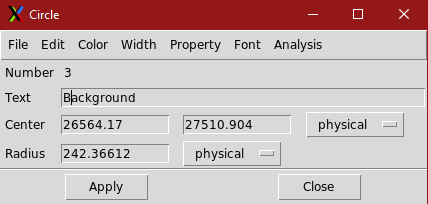

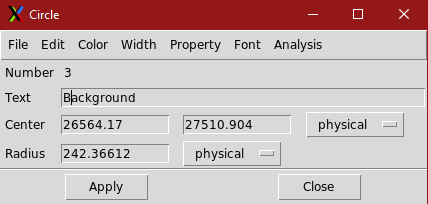

In [15]:
Image(filename="Figures/mos1 back circle.png")

Extracting the source spectrum. There are 2 methods in the resources, 1 uses the "filtered" parameters, the other only uses the "spectrum" parameters

In [ ]:
evselect table=mos1_clean.fits energycolumn='PI' withfilteredset=yes filteredset=mos1_source_filtered.fits keepfilteroutput=yes filtertype=expression withspectrumset=yes spectrumset=mos1_source_spec.fits spectralbinsize=5 withspecranges=yes specchannelmin=0 specchannelmax=11999 expression='((X,Y) IN circle(26201,27967,211.16))'

In [ ]:
evselect table=mos1_clean.fits energycolumn='PI' withspectrumset=yes spectrumset=mos1_source_spec.fits spectralbinsize=5 withspecranges=yes specchannelmin=0 specchannelmax=11999 expression='((X,Y) IN circle(26201,27967,211.16))'

Extracting the background spectrum

In [ ]:
evselect table=mos1_clean.fits withfilteredset=yes filteredset=mos1_bkg_filtered.fits keepfilteroutput=yes filtertype=expression withspectrumset=yes spectrumset=mos1_backg_spec.fits energycolumn=PI spectralbinsize=5 withspecranges=yes specchannelmin=0 specchannelmax=11999 expression='((X,Y) IN circle(26564,27511,242))'

In [ ]:
evselect table=mos1_clean.fits withspectrumset=yes spectrumset=mos1_backg_spec.fits energycolumn=PI spectralbinsize=5 withspecranges=yes specchannelmin=0 specchannelmax=11999 expression='((X,Y) IN circle(26564,27511,242))'

In [ ]:
backscale spectrumset=mos1_source_spec.fits badpixlocation=mos1_clean.fits

In [ ]:
backscale spectrumset=mos1_backg_spec.fits badpixlocation=mos1_clean.fits

This command to generate the pile up graphs only works if the steps above include the "filtered" parameters. I'm not sure if it will work if the last 2 terms are removed.

In [ ]:
epatplot set=mos1_filt.fits plotfile=mos1_pileup.ps useplotfile=yes withbackgroundset=yes backgroundset=mos1_bkg_filtered.fits

In [ ]:
gv mos1_pileup.ps &

<img src="Figures/mos1%20pileup.png"/>
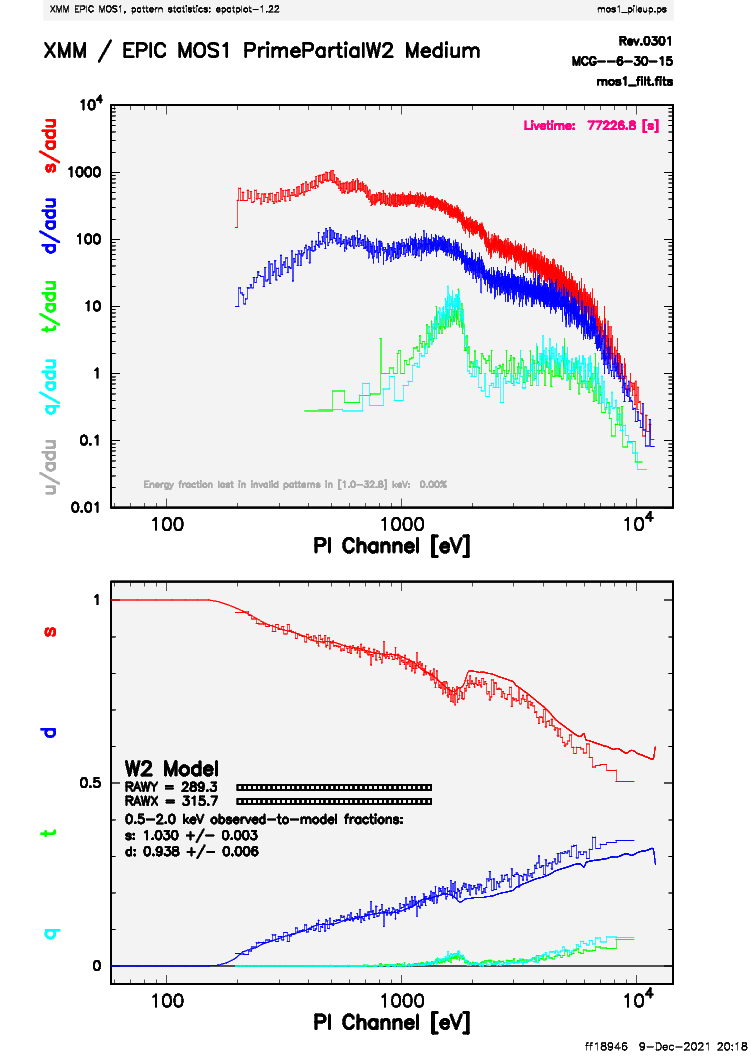

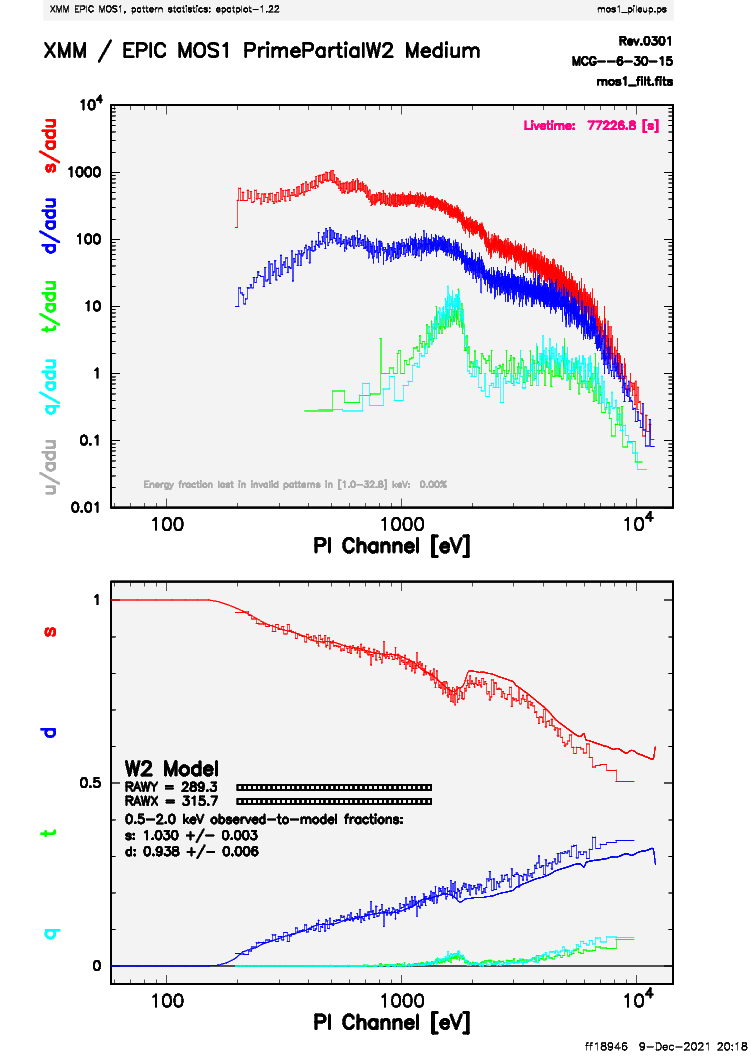

In [17]:
Image(filename="Figures/mos1 pileup.png")

### MOS2

In [ ]:
ds9 mos2_clean.fits &

<img src="Figures/mos2%20regions.png"/>
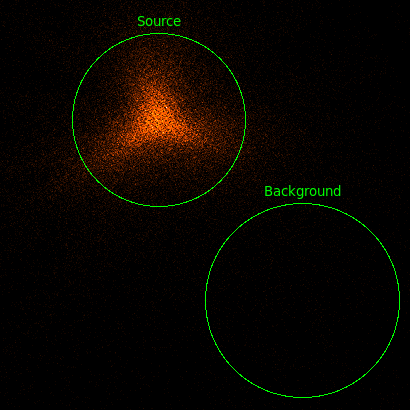

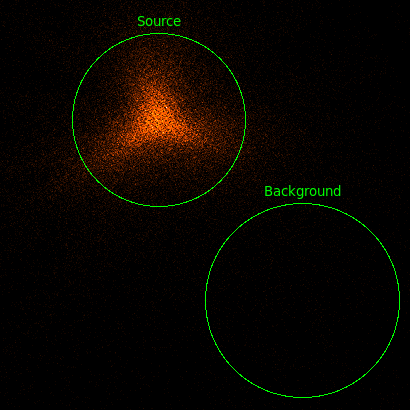

In [20]:
Image(filename="Figures/mos2 regions.png")

<img src="Figures/mos2%20source%20region.png"/>
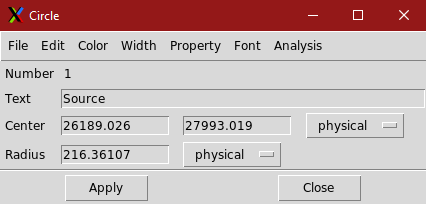

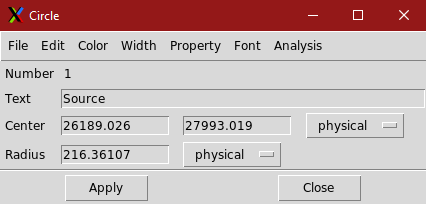

In [21]:
Image(filename="Figures/mos2 source region.png")

<img src="Figures/mos2%20back%20region.png"/>
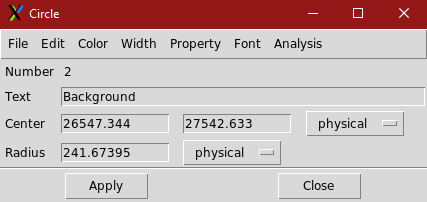

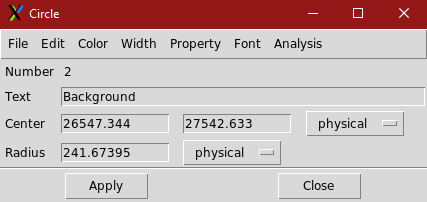

In [23]:
Image(filename="Figures/mos2 back region.png")

Extracting the source spectrum

In [ ]:
evselect table=mos2_clean.fits energycolumn='PI' withfilteredset=yes filteredset='mos2_filt.fits' keepfilteroutput=yes filtertype=expression withspectrumset=yes spectrumset=mos2_source_spec.fits spectralbinsize=5 withspecranges=yes specchannelmin=0 specchannelmax=11999 expression='((X,Y) IN circle(26189,27993,216))'

In [ ]:
evselect table=mos2_clean.fits withfilteredset=yes filteredset=mos2_bkg_filt.fits keepfilteroutput=yes filtertype=expression withspectrumset=yes spectrumset=mos2_backg_spec.fits energycolumn=PI spectralbinsize=5 withspecranges=yes specchannelmin=0 specchannelmax=11999 expression='((X,Y) IN circle(26547,27543,242))'

In [ ]:
epatplot set=mos2_filt.fits plotfile=mos2_pileup.ps useplotfile=yes withbackgroundset=yes backgroundset=mos2_bkg_filt.fits

In [ ]:
gv mos2_pileup.ps &

<img src="Figures/mos2%20pileup.png"/>
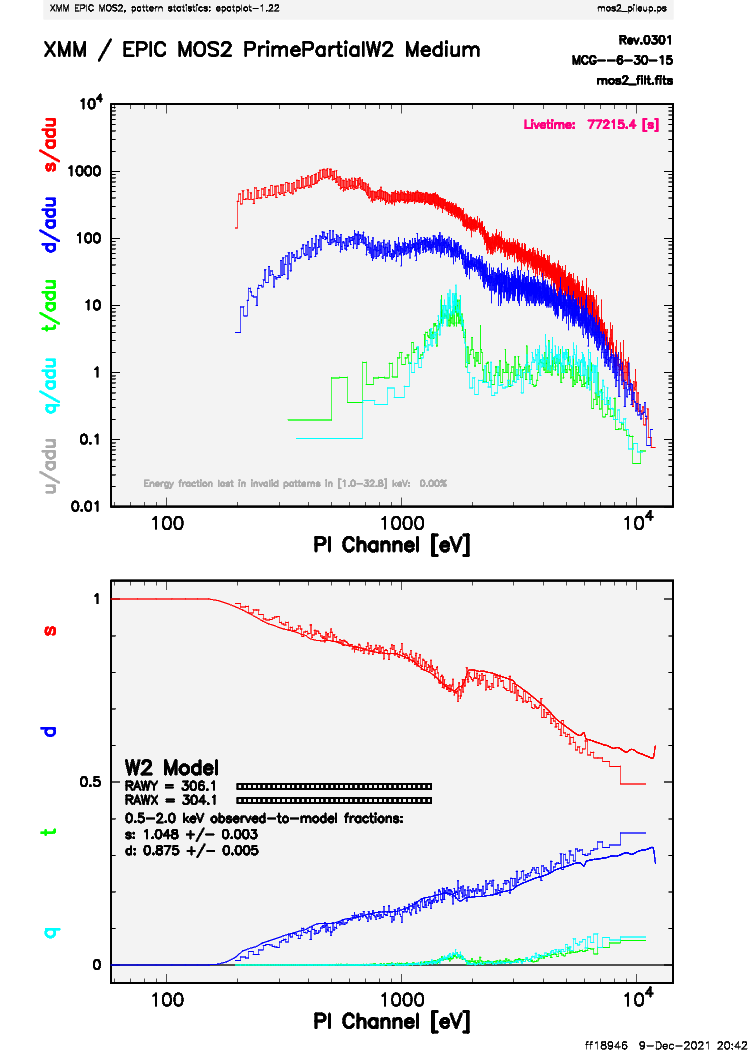

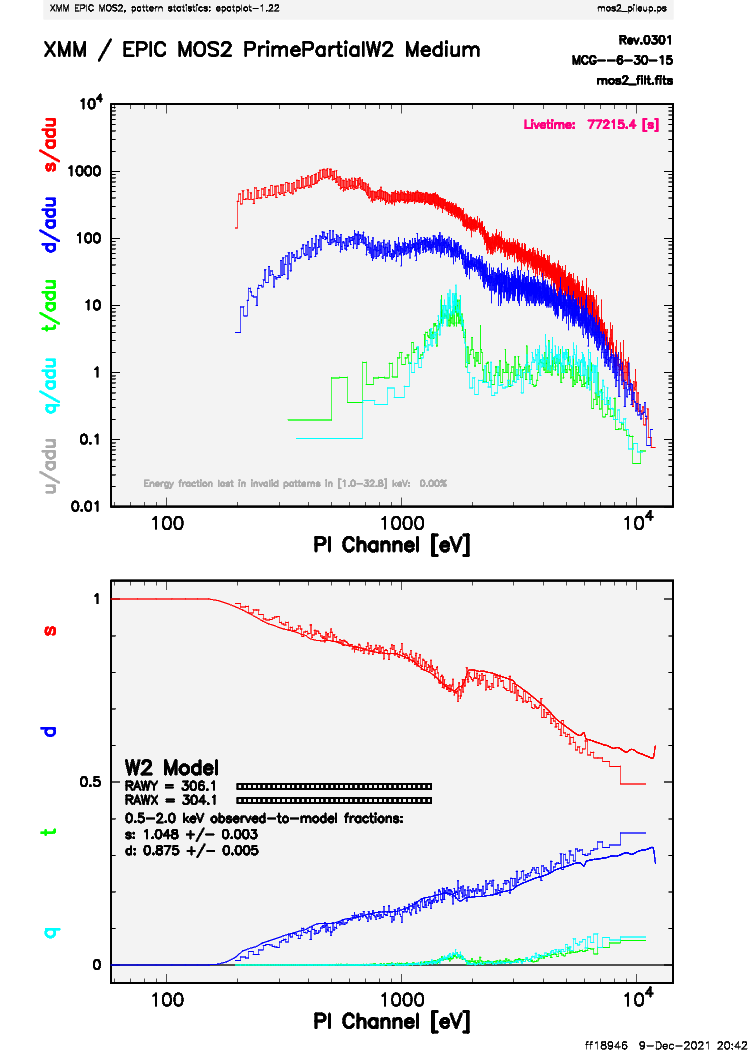

In [24]:
Image(filename="Figures/mos2 pileup.png")

## Preparing the Spectrum

### MOS1

In [ ]:
rmfgen rmfset=mos1.rmf spectrumset=mos1_source_spec.fits

In [ ]:
arfgen arfset=mos1.arf spectrumset=mos1_source_spec.fits withrmfset=yes rmfset=mos1.rmf badpixlocation=mos1_clean.fits detmaptype=psf

In [ ]:
specgroup spectrumset=mos1_source_spec.fits mincounts=25 oversample=3 rmfset=mos1.rmf arfset=mos1.arf backgndset=mos1_backg_spec.fits groupedset=mos1_spectrum_grp.fits

### MOS2

In [ ]:
rmfgen rmfset=mos2.rmf spectrumset=mos2_source_spec.fits

In [ ]:
arfgen arfset=mos2.arf spectrumset=mos2_source_spec.fits withrmfset=yes rmfset=mos2.rmf badpixlocation=mos2_clean.fits detmaptype=psf

In [ ]:
specgroup spectrumset=mos2_source_spec.fits mincounts=25 oversample=3 rmfset=mos2.rmf arfset=mos2.arf backgndset=mos2_backg_spec.fits groupedset=mos2_spectrum_grp.fits

## XSPEC

### MOS1

In [ ]:
XSPEC12>data mos1_spectrum_grp.fits

In [ ]:
XSPEC12>cpd /xs

In [ ]:
XSPEC> ignore 0.0-0.2

In [ ]:
XSPEC12>plot ldata

<img src="Figures/mos1_spectrum.png"/>
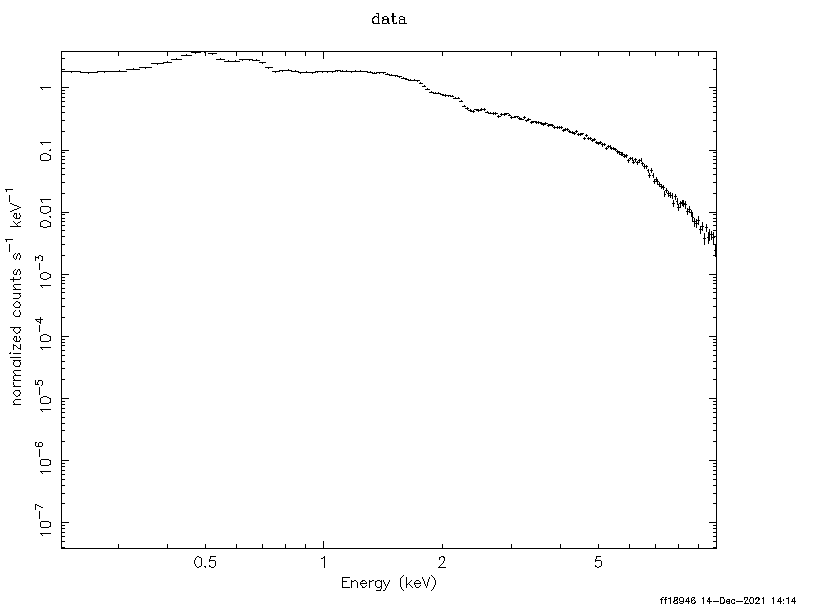

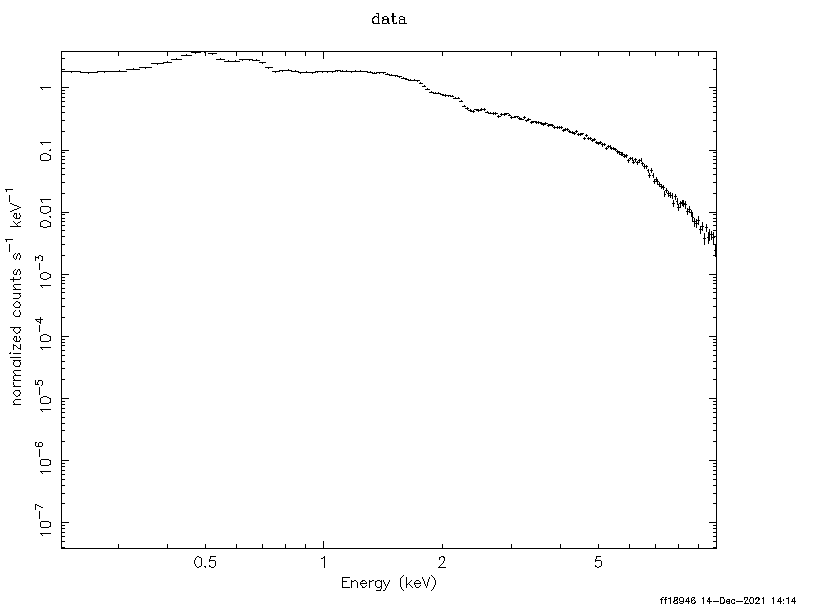

In [25]:
Image(filename="Figures/mos1_spectrum.png")

In [ ]:
XSPEC12> model powerlaw

In [ ]:
1:powerlaw:PhoIndex>3

In [ ]:
2:powerlaw:norm>1

In [ ]:
XSPEC12> fit

In [ ]:
XSPEC12>plot ldata delchi

<img src="Figures/mos1_spectrum_powerlaw.png"/>
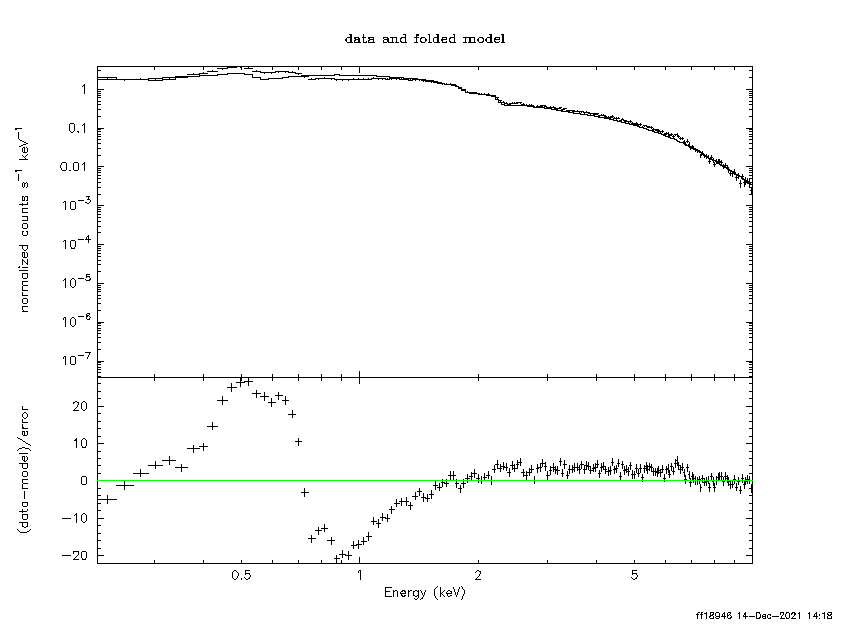

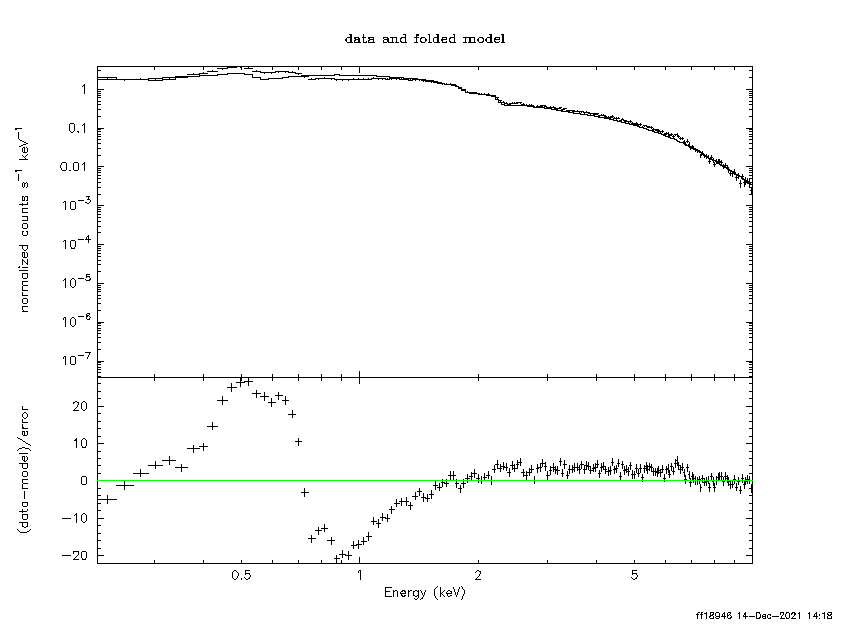

In [26]:
Image(filename="Figures/mos1_spectrum_powerlaw.png")

In [ ]:
XSPEC12> ignore 0.0-2.2

In [ ]:
XSPEC12> plot ldata delchi

<img src="Figures/mos1_spec_zoomed.png"/>
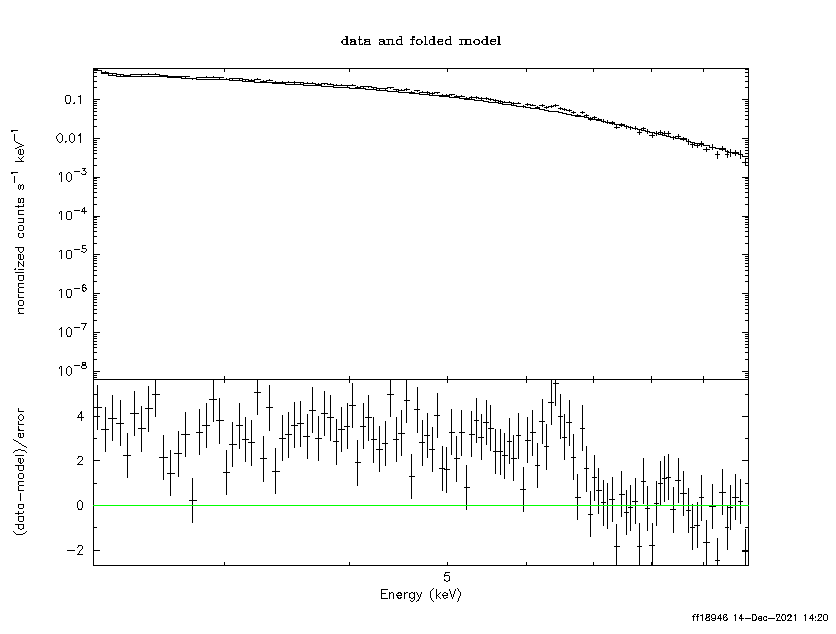

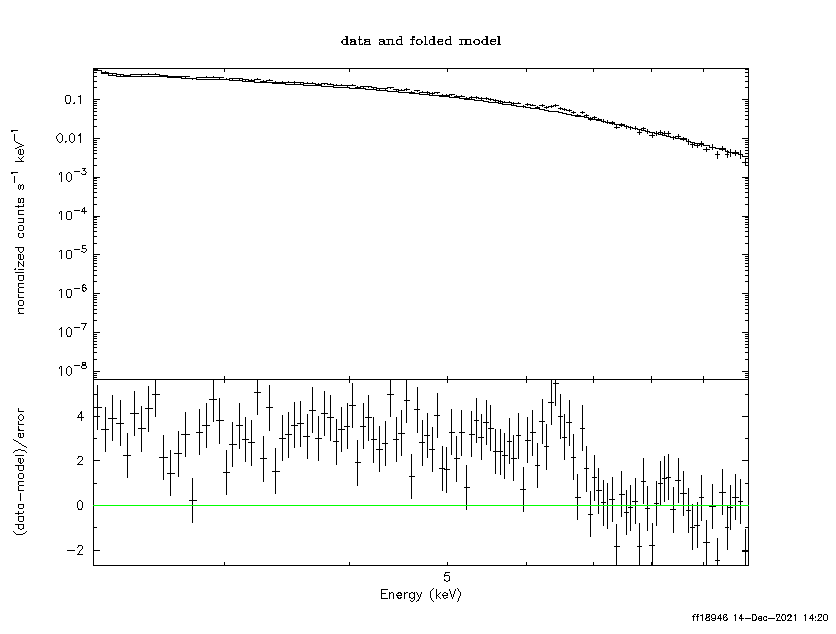

In [27]:
Image(filename="Figures/mos1_spec_zoomed.png")

In [ ]:
XSPEC12> fit

In [ ]:
XSPEC12> plot ldata delchi

<img src="Figures/mos1_spec_v2.png"/>
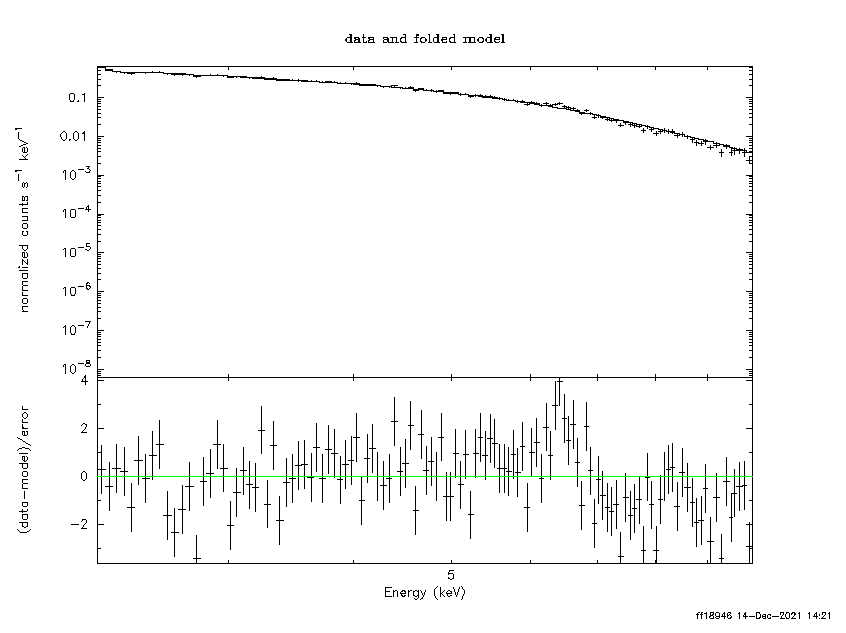

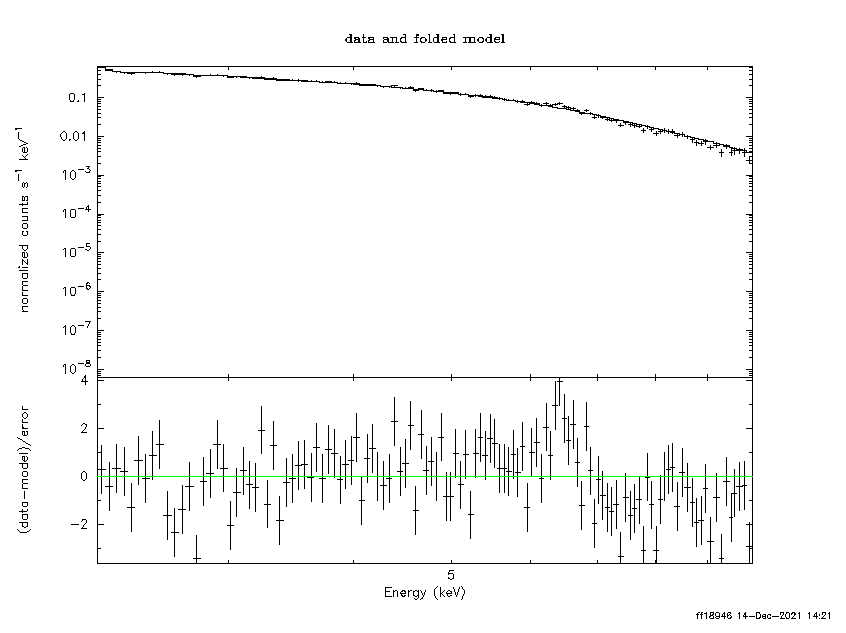

In [28]:
Image(filename="Figures/mos1_spec_v2.png")

This is a very messy residual graph... maybe the unfolded spectrum will look better

####  mos1 unfolded spectrum

In [ ]:
XSPEC12>data mos1_spectrum_grp.fits

In [ ]:
XSPEC12>setplot energy

In [ ]:
XSPEC12>cpd /xs

In [ ]:
XSPEC12> ignore 0.0-2.2 , 3.0-8.0

In [ ]:
XSPEC12> plot ldata

<img src="Figures/mos1_restricted_spec.png"/>
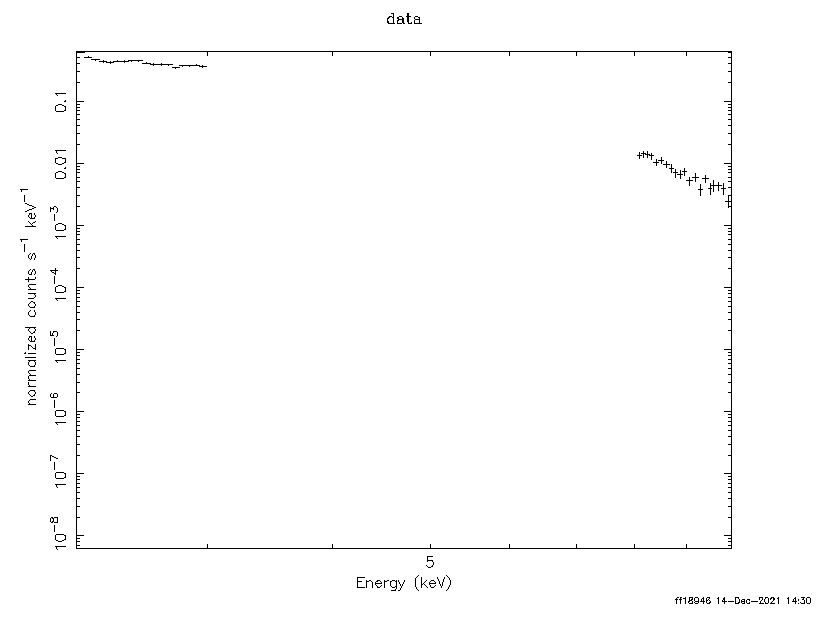

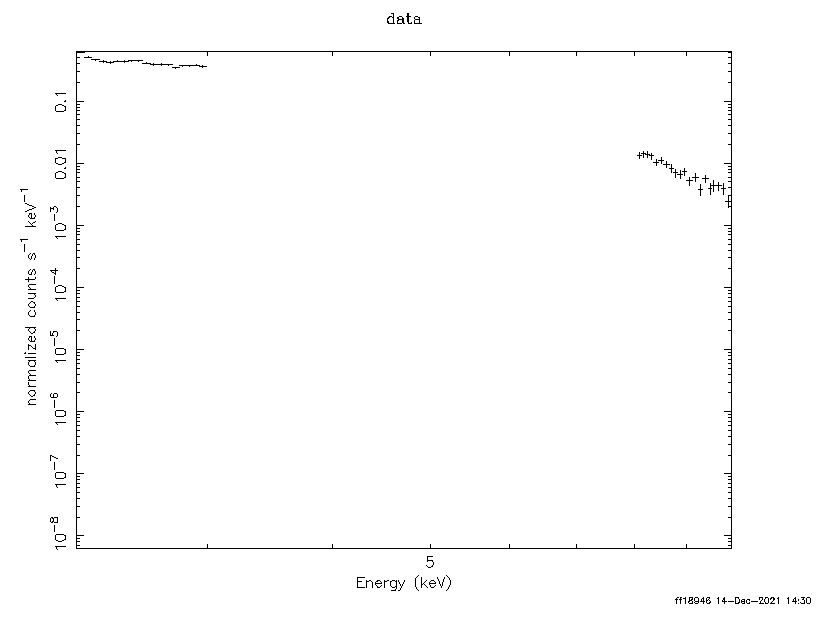

In [29]:
Image(filename="Figures/mos1_restricted_spec.png")

In [ ]:
XSPEC12> model powerlaw

In [ ]:
1:powerlaw:PhoIndex>-3

In [ ]:
2:powerlaw:norm>1

In [ ]:
XSPEC12> fit

In [ ]:
XSPEC12> notice 3.0-8.0

In [ ]:
XSPEC12> plot ldata delchi

<img src="Figures/mos1_unfolded_fitted.png"/>
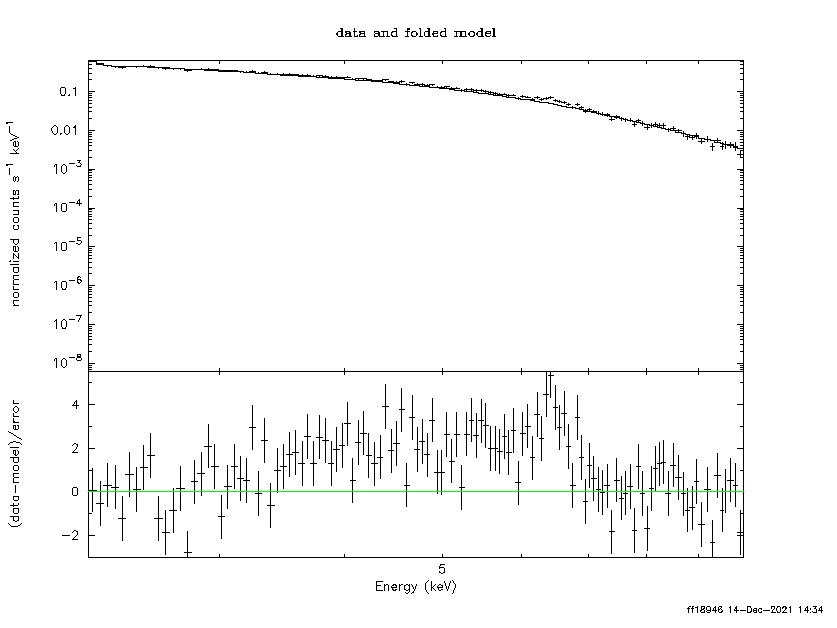

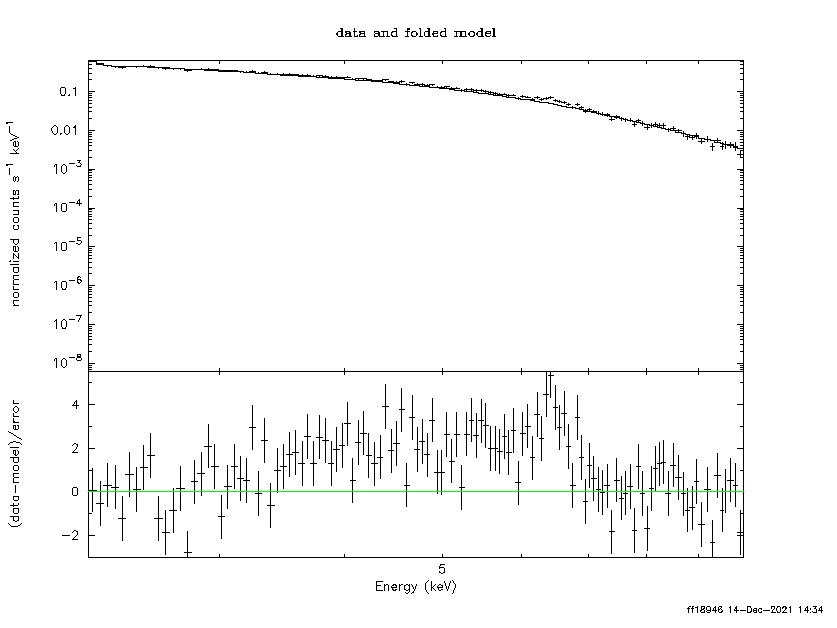

In [30]:
Image(filename="Figures/mos1_unfolded_fitted.png")

In [ ]:
XSPEC12> plot eeufs

<img src="Figures/mos1_eeufs.png"/>
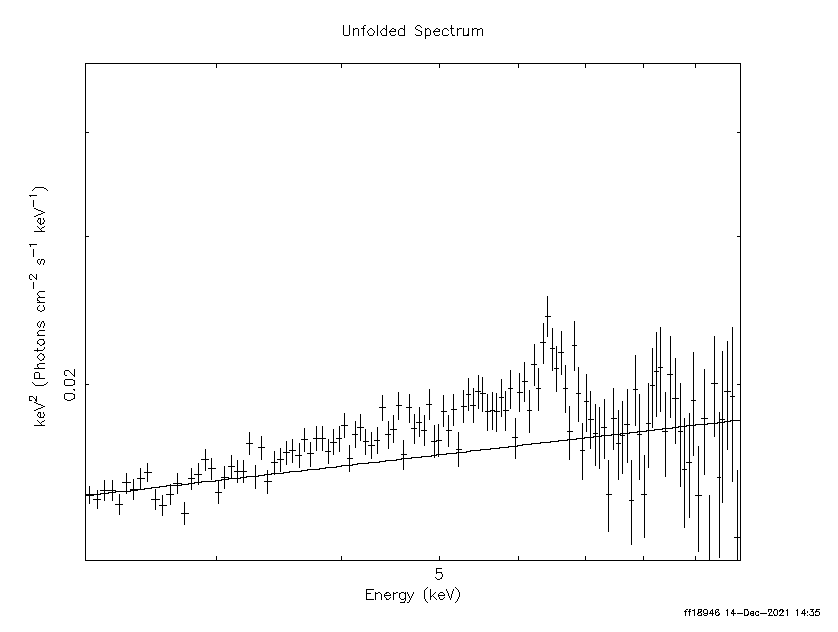

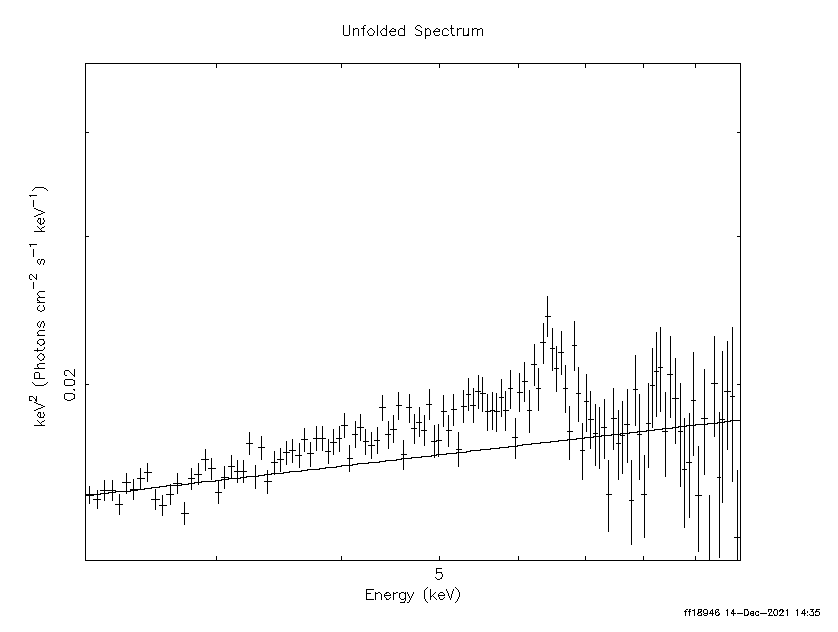

In [31]:
Image(filename="Figures/mos1_eeufs.png")

In [ ]:
XSPEC12> iplot

In [ ]:
PLT> Rescale Y 0.01 0.03

<img src="Figures/mos1_eeufs_scaled.png"/>
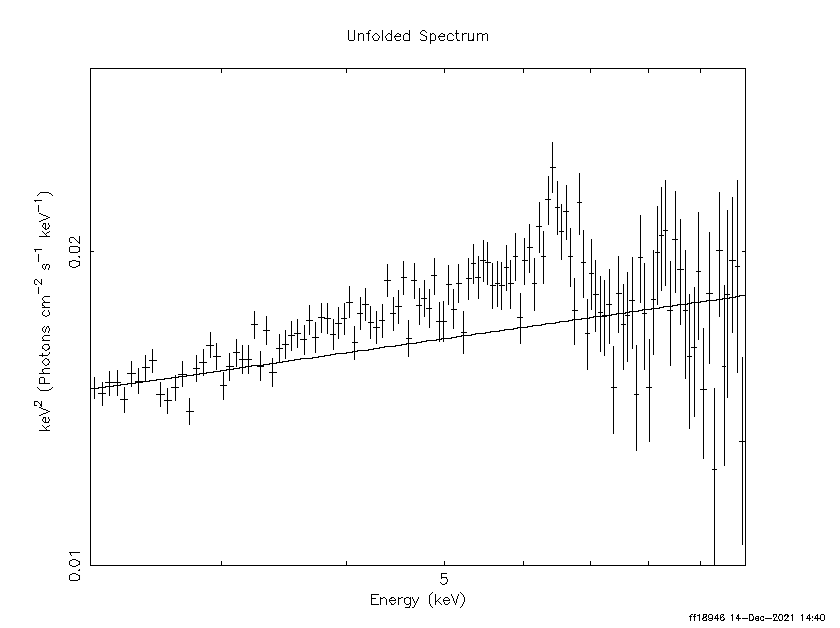

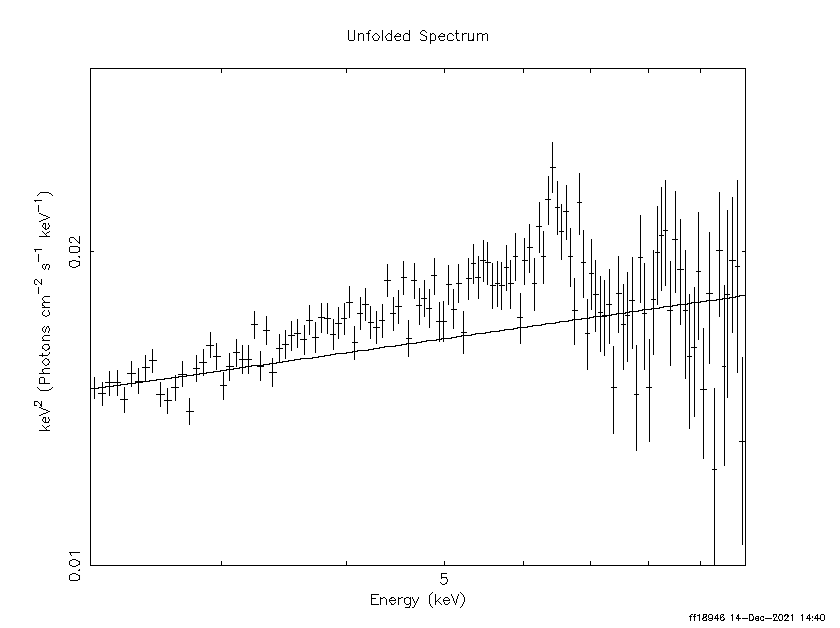

In [32]:
Image(filename="Figures/mos1_eeufs_scaled.png")

#### MOS2

<img src="Figures/mos2_spectrum.png"/>

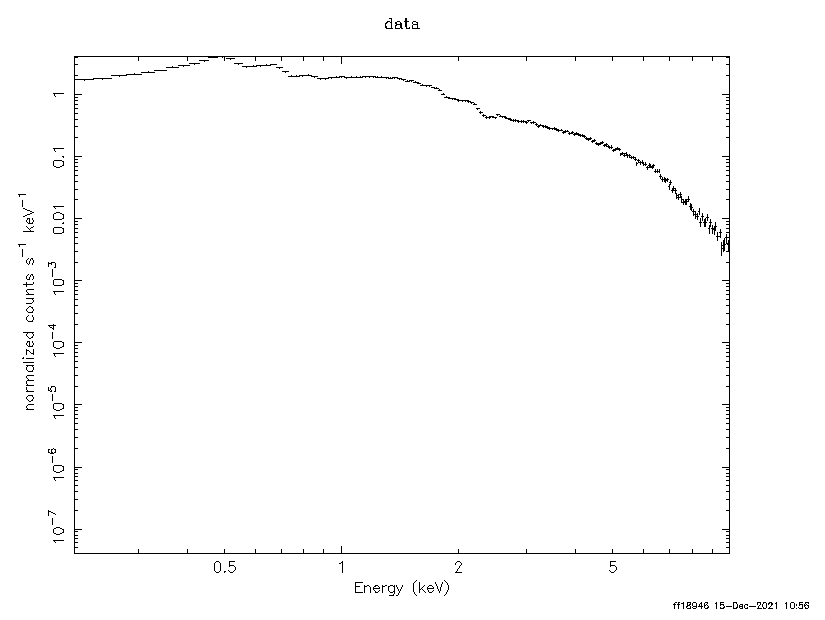

In [33]:
Image(filename="Figures/mos2_spectrum.png")

<img src="Figures/mos2_powerlaw.png"/>

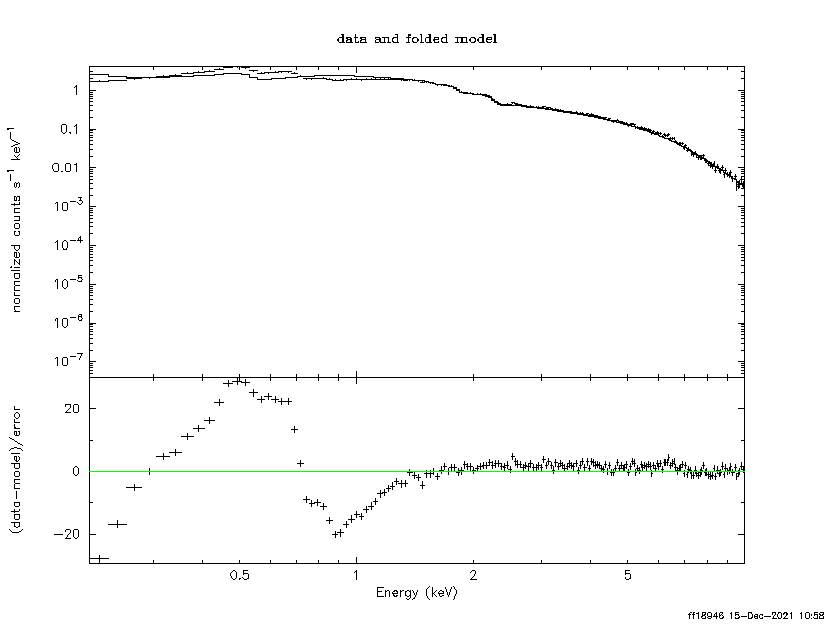

In [34]:
Image(filename="Figures/mos2_powerlaw.png")

<img src="Figures/mos2_powerlaw_zoomed.png"/>

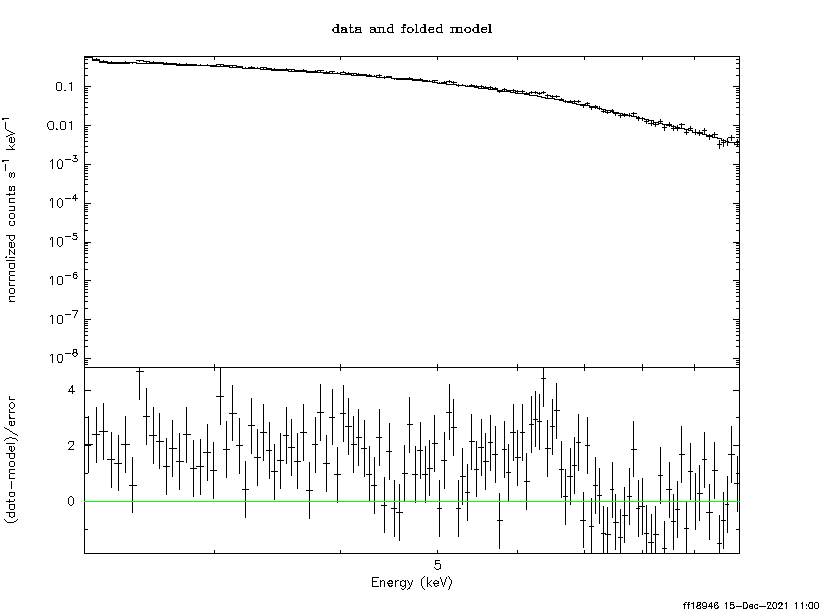

In [35]:
Image(filename="Figures/mos2_powerlaw_zoomed.png")

<img src="Figures/mos2_powerlaw_zoomedv2.png"/>

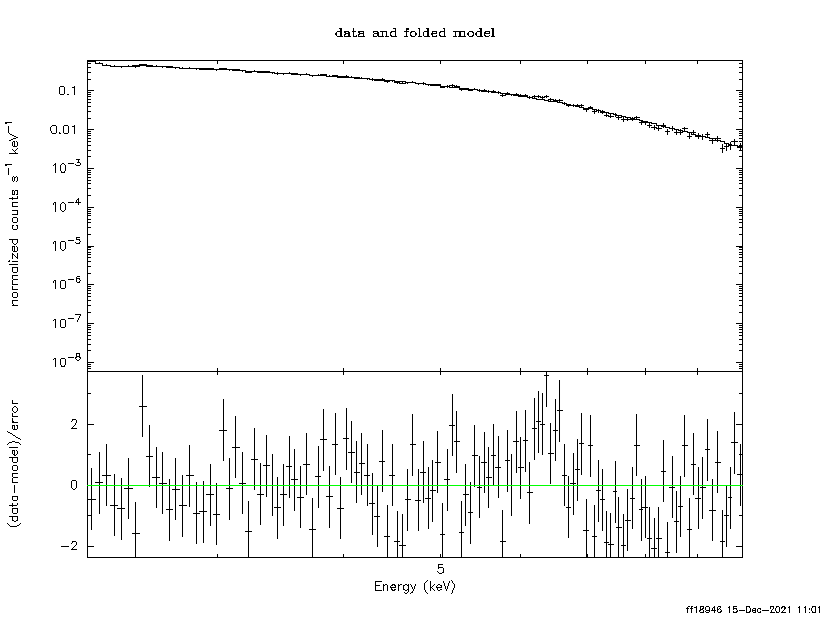

In [36]:
Image(filename="Figures/mos2_powerlaw_zoomedv2.png")

#### 6.2.1 MOS2 unfolded spectrum<a class="anchor" id="mos2_eeufs"></a>

<img src="Figures/mos2_restricted_spectrum.png"/>

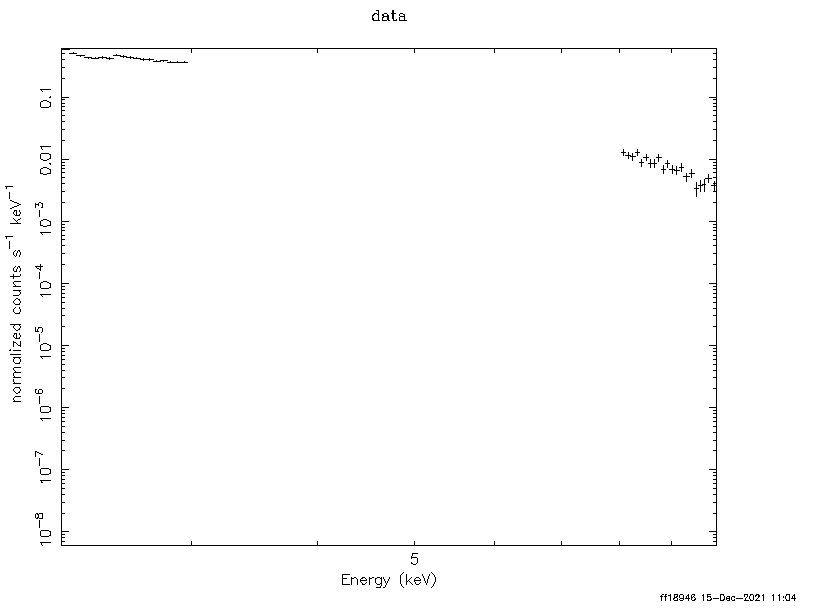

In [37]:
Image(filename="Figures/mos2_restricted_spectrum.png")

<img src="Figures/mos2_restricted_fit.png"/>

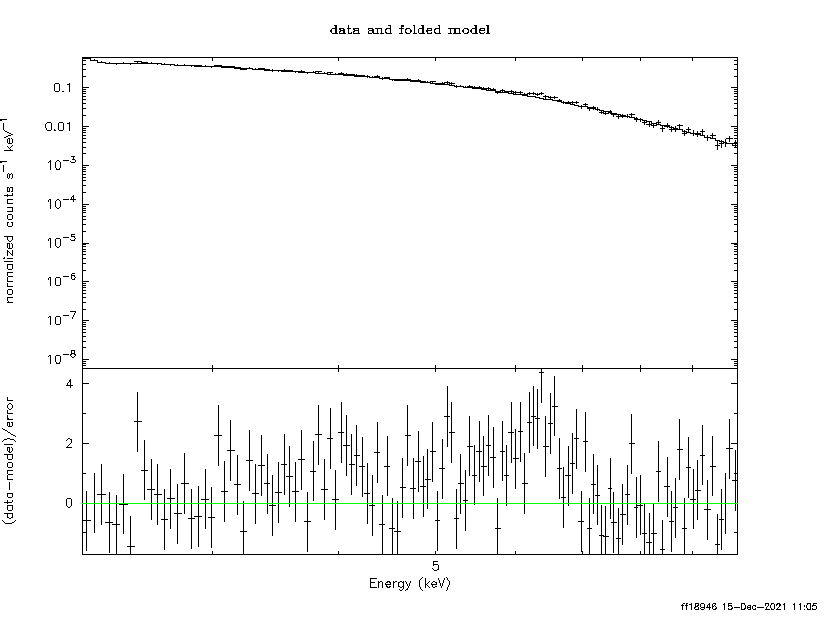

In [38]:
Image(filename="Figures/mos2_restricted_fit.png")

<img src="Figures/mos2_eeufs.png"/>

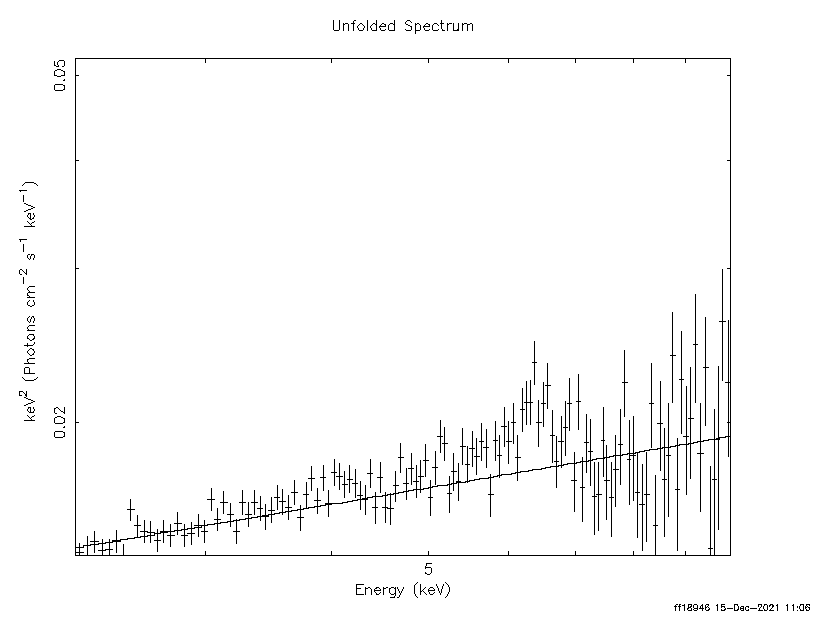

In [39]:
Image(filename="Figures/mos2_eeufs.png")

<img src="Figures/mos2_eeufs_rescaled.png"/>

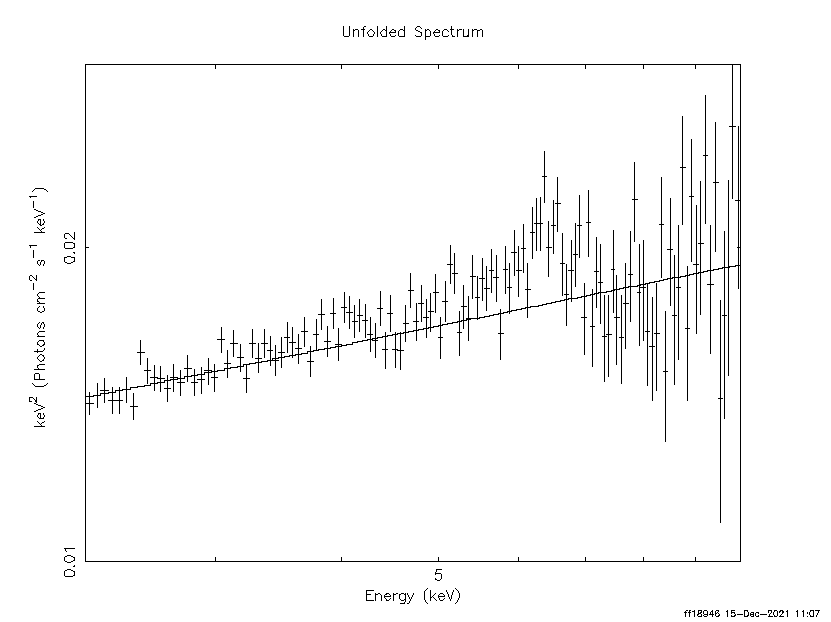

In [40]:
Image(filename="Figures/mos2_eeufs_rescaled.png")

## Merging the MOS Data

Following this thread:
https://www.cosmos.esa.int/web/xmm-newton/sas-thread-epic-merging

### MOS1 Files

In [ ]:
evselect table=mos1_clean.fits expression='((X,Y) IN circle(26201,27967,211.16))' withspectrumset=yes spectrumset=src_spectrum_mos1.ds spectralbinsize=5 specchannelmin=0 specchannelmax=11999 energycolumn=PI 

In [ ]:
backscale spectrumset=src_spectrum_mos1.ds badpixlocation=mos1_clean.fits

In [ ]:
evselect table=mos1_clean.fits expression='((X,Y) IN circle(26564,27511,242))' withspectrumset=yes spectrumset=bkg_spectrum_mos1.ds spectralbinsize=5 specchannelmin=0 specchannelmax=11999 energycolumn=PI

In [ ]:
backscale spectrumset=bkg_spectrum_mos1.ds badpixlocation=mos1_clean.fits

In [ ]:
rmfgen spectrumset=src_spectrum_mos1.ds rmfset=response_mos1.rmf withenergybins=yes energymin=0.1 energymax=12 nenergybins=1190

In [ ]:
arfgen spectrumset=src_spectrum_mos1.ds arfset=arf_mos1.arf withrmfset=yes rmfset=response_mos1.rmf

### MOS2 Files

In [ ]:
evselect table=mos2_clean.fits expression='((X,Y) IN circle(26189,27993,216))' withspectrumset=yes spectrumset=src_spectrum_mos2.ds spectralbinsize=5 specchannelmin=0 specchannelmax=11999 energycolumn=PI 

In [ ]:
backscale spectrumset=src_spectrum_mos2.ds badpixlocation=mos2_clean.fits

In [ ]:
evselect table=mos2_clean.fits expression='((X,Y) IN circle(26547,27543,242))' withspectrumset=yes spectrumset=bkg_spectrum_mos2.ds spectralbinsize=5 specchannelmin=0 specchannelmax=11999 energycolumn=PI

In [ ]:
backscale spectrumset=bkg_spectrum_mos2.ds badpixlocation=mos2_clean.fits

In [ ]:
rmfgen spectrumset=src_spectrum_mos2.ds rmfset=response_mos2.rmf withenergybins=yes energymin=0.1 energymax=12 nenergybins=1190

In [ ]:
arfgen spectrumset=src_spectrum_mos2.ds arfset=arf_mos2.arf withrmfset=yes rmfset=response_mos2.rmf

### Combining the Spectral Files

epicspeccombine pha="src_spectrum_mos1.ds src_spectrum_mos2.ds" bkg="bkg_spectrum_mos1.ds bkg_spectrum_mos2.ds" rmf="response_mos1.rmf response_mos2.rmf" arf="arf_mos1.arf arf_mos2.arf" filepha="src_spectrum_combined.ds" filebkg="bkg_spectrum_combined.ds" filersp="response_combined.rmf" allowHEdiff=yes

In [ ]:
epicspeccombine pha="src_spectrum_mos1.ds src_spectrum_mos2.ds" bkg="bkg_spectrum_mos1.ds bkg_spectrum_mos2.ds" rmf="response_mos1.rmf response_mos2.rmf" arf="arf_mos1.arf arf_mos2.arf" filepha="src_spectrum_combined.ds" filebkg="bkg_spectrum_combined.ds" filersp="response_combined.rmf" 

In [ ]:
specgroup spectrumset=src_spectrum_combined.ds mincounts=25 oversample=3 rmfset=response_combined.rmf backgndset=bkg_spectrum_combined.ds groupedset=combined_spectrum.fits

### Fitting the Combined Spectrum

In [ ]:
xspec> data src_spectrum_combined.ds

In [ ]:
xspec> setplot e

In [ ]:
xspec> cpd /xs

In [ ]:
xpsec> pl ld

***XSPEC Error: No energies defined for spectrum 1, but plot requested on energy/wavelength axis.
 Plot Group 1 will not be constructed


It seems that either the rmf or arf is not combining properly...

To get around this I added the combined response manually:

In [ ]:
xspec> response response_combined.rmf

Ignoring the usual energy ranges and fitting this with a powerlaw yielded:


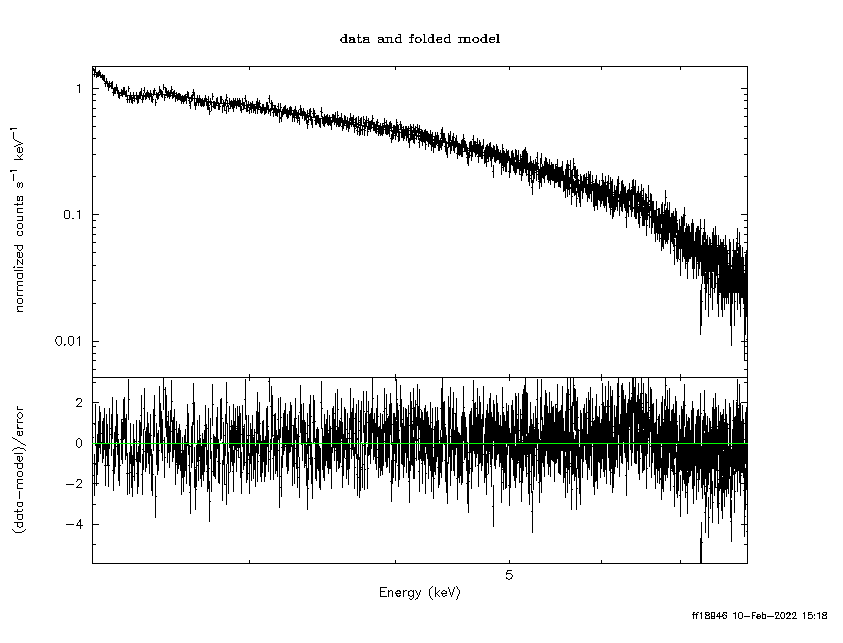

In [4]:
Image(filename="Figures/mos_combined_graph.png")

This is a very messy graph and it is difficult to see any detail in the residual panel.
Hopefully removing the background flares in the lightcurve can remedy this.

## Fitting Models 

### Laor2 

The unmerged data from the mos 1 is fitted with a laor 2 model, following the same parameters chosen in model 4 of the Fabian 2002 paper. 

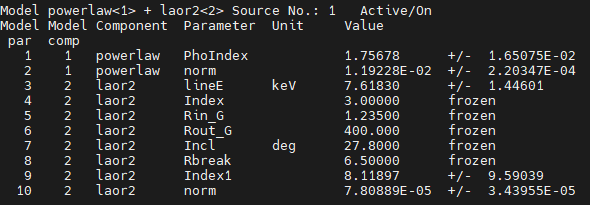

In [3]:
Image(filename="Figures/Mos1_laor2_param.png")

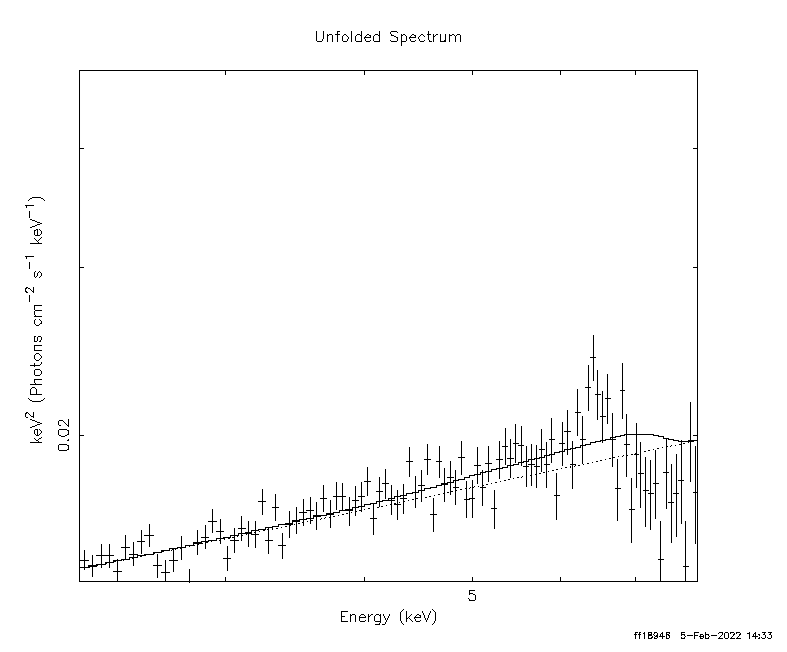

In [4]:
Image(filename="Figures/Mos1_laor2_graph.png")

There seems to be either an issue with the model parameters or the mos data itself. As the data points are not significantly deviating from the continuum line at E~5keV, it seems that the data itslef is incorrect, as it should exhibit the same behaviour as the PN data.

## Removing Background Flares 

In the lightcurve for both the mos1 and mos2 cameras, there are many flares which could be affecting the data. First, a lightcurve of the background regions for each camera will be made and compared to the overall lightcurve found earlier.

Then the lightcurve will be filtered to exclude the flaring events arising from background data.

###  MOS1

A lightcurve for the background in the mos1 camera is made using the background region found earlier.

In [ ]:
evselect table=mos1_filtered.fits withfilteredset=yes expression='((X,Y) IN circle(26564,27511,242.4))' filteredset=mos1_background_spec.fits filtertype=expression keepfilteroutput=yes

In [ ]:
evselect table=mos1_background_spec.fits withrateset=yes rateset=mos1_background_lightcurve.fits maketimecolumn=yes timecolumn=TIME timebinsize=100 makeratecolumn=yes

In [ ]:
dsplot table=mos1_background_lightcurve.fits x=TIME y=RATE &

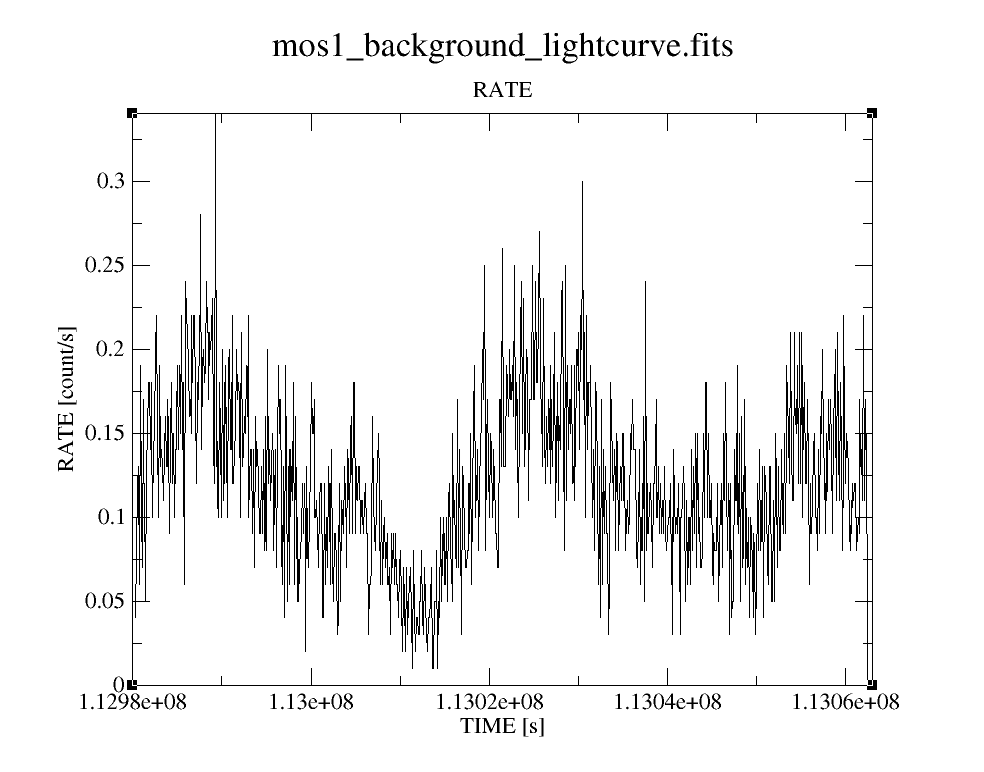

In [5]:
Image(filename="Figures/mos1_bkg_lightcurve.png")

#### Changing background Area

The region for the background area was taken to be everywhere on the chip excluding the source region.

In [ ]:
evselect table=mos1_filtered.fits withfilteredset=yes expression='!((X,Y) IN circle(26201.29,27967,211))' filteredset=mos1_background_spec.fits filtertype=expression keepfilteroutput=yes

In [ ]:
evselect table=mos1_background_spec.fits withrateset=yes rateset=mos1_background_lightcurve.fits maketimecolumn=yes timecolumn=TIME timebinsize=100 makeratecolumn=yes

In [ ]:
dsplot table=mos1_background_lightcurve.fits x=TIME y=RATE &

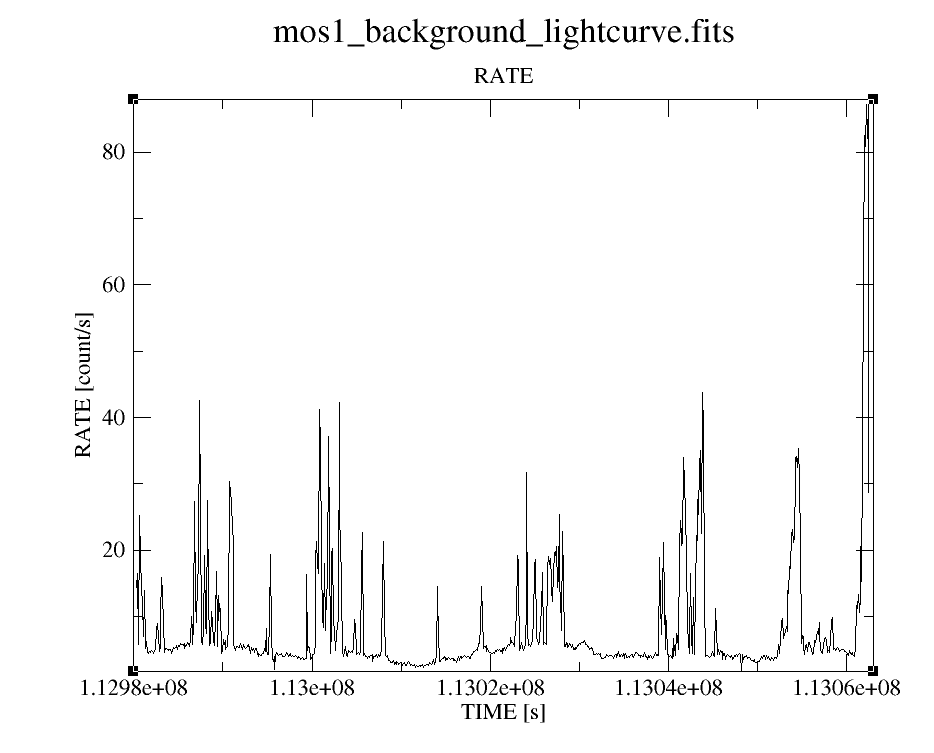

In [2]:
Image(filename="Figures/mos1_background_lightcurve_full_region.png")

###  MOS2

In [ ]:
evselect table=mos2_filtered.fits withfilteredset=yes expression='((X,Y) IN circle(26547,27542,242))' filteredset=mos2_background_spec.fits filtertype=expression keepfilteroutput=yes

In [ ]:
evselect table=mos2_background_spec.fits withrateset=yes rateset=mos2_background_lightcurve.fits maketimecolumn=yes timecolumn=TIME timebinsize=100 makeratecolumn=yes

In [ ]:
dsplot table=mos2_background_lightcurve.fits x=TIME y=RATE &

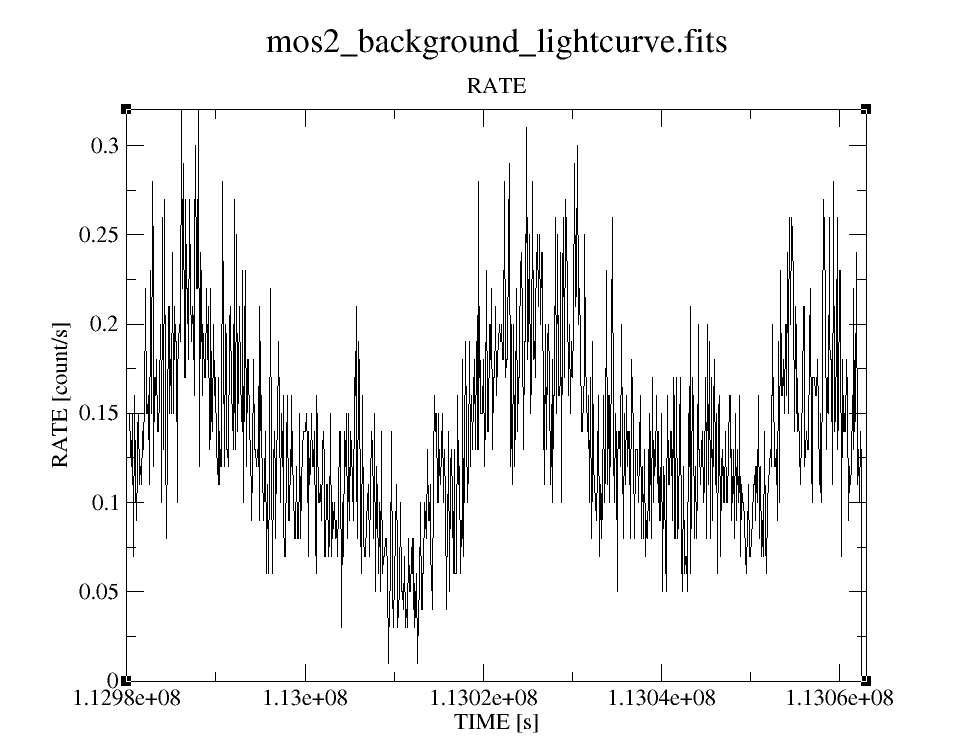

In [7]:
Image(filename="Figures/mos2_bkg_lightcurve.png")

These lightcurves seem to contribute very little to the overall lightcurve found earlier. For interest, the lightcurves of only the source regions are made

In [ ]:
evselect table=mos1_filtered.fits withfilteredset=yes expression='((X,Y) IN circle(26201,27967,211))' filteredset=mos1_source_spec.fits filtertype=expression keepfilteroutput=yes

In [ ]:
evselect table=mos1_source_spec.fits withrateset=yes rateset=mos1_source_lightcurve.fits maketimecolumn=yes timecolumn=TIME timebinsize=100 makeratecolumn=yes

In [ ]:
dsplot table=mos1_source_lightcurve.fits x=TIME y=RATE &

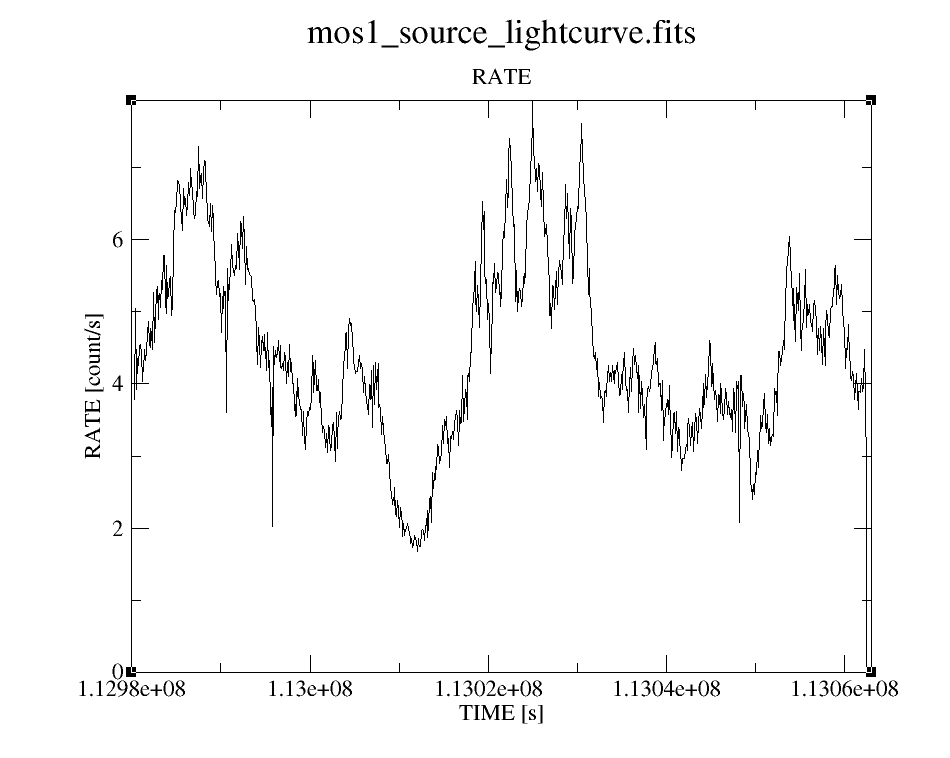

In [8]:
Image(filename="Figures/mos1_source_lightcurve.png")

This is very confusing as both the source and backgroud lightcurves here match the lightcurve seen with the PN data, but not the initial lightcurve found for both mos cameras previously. I am not sure why this lightcurve is so different from the other one, it appears that the flaring events that were present in the initial lightcurve are no longer present, but I have use the same files as before.

## Lightcurve Correction

### Source Region

In [ ]:
evselect table=mos1_filtered.fits energycolumn=PI expression='((X,Y) IN circle(26201.29,27967,211))'  withrateset=yes rateset=mos1_source_lightcurve_raw.lc timebinsize=100 makeratecolumn=yes maketimecolumn=yes

In [ ]:
evselect table=mos2_filtered.fits energycolumn=PI expression='((X,Y) IN circle(26189,27993,216.36))'  withrateset=yes rateset=mos2_source_lightcurve_raw.lc timebinsize=100 makeratecolumn=yes maketimecolumn=yes

### Background Region

In [ ]:
evselect table=mos1_filtered.fits energycolumn=PI expression='((X,Y) IN circle(26564.17,27510.94,242.366))'  withrateset=yes rateset=mos1_bkg_lightcurve_raw.lc timebinsize=100 makeratecolumn=yes maketimecolumn=yes

In [ ]:
evselect table=mos2_filtered.fits energycolumn=PI expression='((X,Y) IN circle(26547.3,27542.6,241.67))'  withrateset=yes rateset=mos2_bkg_lightcurve_raw.lc timebinsize=100 makeratecolumn=yes maketimecolumn=yes

### Correction

In [ ]:
epiclccorr srctslist=mos1_source_lightcurve_raw.lc eventlist=mos1_filtered.fits outset=mos1_corrected_lc.lc bkgtslist=mos1_bkg_lightcurve_raw.lc withbkgset=yes applyabsolutecorrections=yes


In [ ]:
epiclccorr srctslist=mos2_source_lightcurve_raw.lc eventlist=mos2_filtered.fits outset=mos2_corrected_lc.lc bkgtslist=mos2_bkg_lightcurve_raw.lc withbkgset=yes applyabsolutecorrections=yes


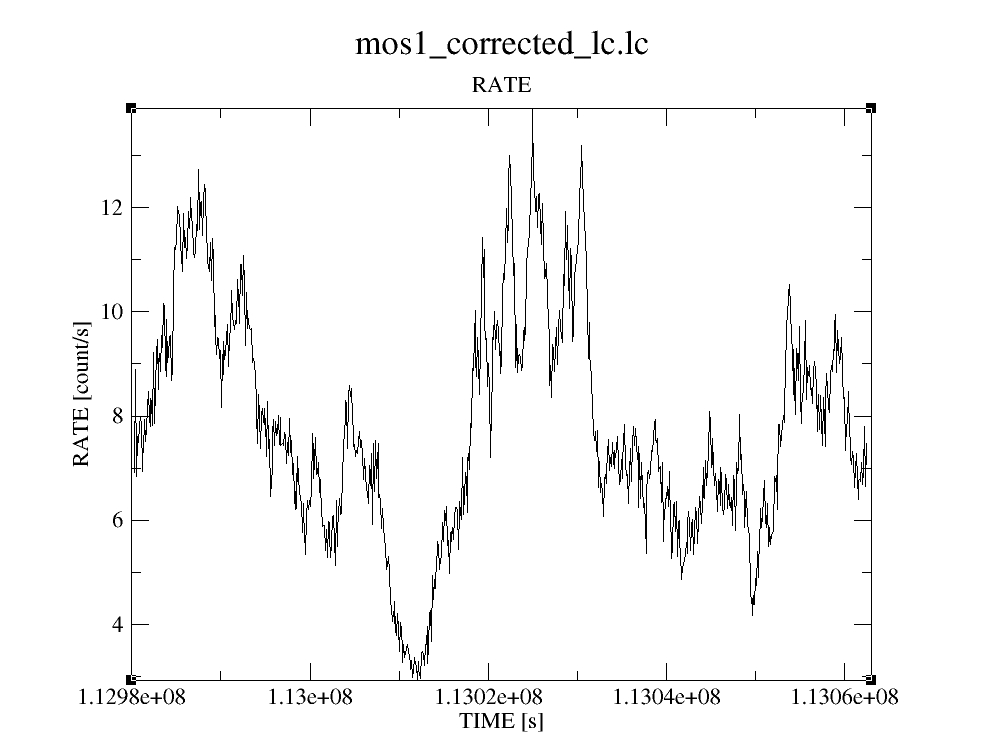

In [2]:
Image(filename="Figures/mos1_corrected_lc.png")

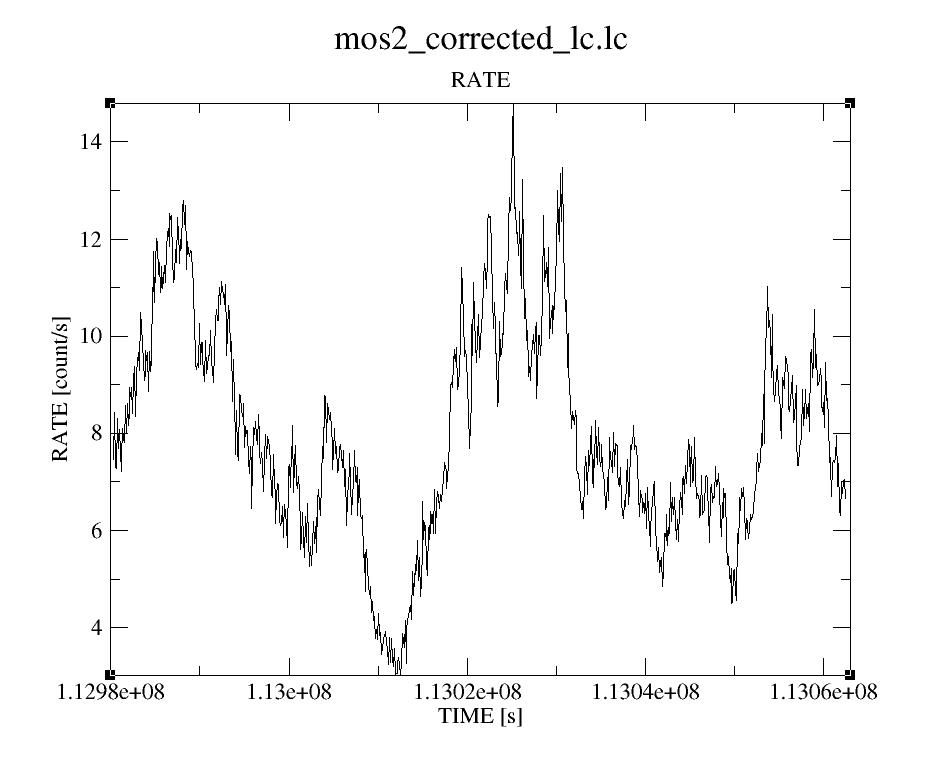

In [3]:
Image(filename="Figures/mos2_corrected_lc.png")